# 52954 - Machine Learning and Statistics - Project

## Mark Kelly - 2019

This assessment concerns the Boston House Prices dataset and is broken up into 3 main sections:
- Describe
- Infer
- Predict

__Describe__: Create a git repository and make it available online for the lecturer to clone. The repository should contain all your work for this assessment. Within the repository, create a jupyter notebook that uses descriptive statistics and plots to describe the Boston House Prices dataset. This part is worth 20% of your overall mark.

__Infer__: To the above jupyter notebook, add a section where you use inferential statistics to analyse whether there is a signiﬁcant diﬀerence in median house prices between houses that are along the Charles river and those that aren’t. You should explain and discuss your ﬁndings within the notebook.

__Predict__: Again using the same notebook, use keras to create a neural network that can predict the median house price based on the other variables in the dataset. You are free to interpret this as you wish — for example, you may use all the other variables, or select a subset. 

## Section 1 - Describe

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as ss
import statsmodels.stats.weightstats as ws

In [2]:
from sklearn.datasets import load_boston
df_boston = load_boston()
import matplotlib.pyplot as plt

In [3]:
import keras as kr

Using TensorFlow backend.


In [4]:
# For encoding categorical variables.
import sklearn.preprocessing as pre

# For splitting into training and test sets.
import sklearn.model_selection as mod

import sklearn.decomposition as dec

In [5]:
type(df_boston)

sklearn.utils.Bunch

In [6]:
print(df_boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [7]:
df = pd.DataFrame(data=df_boston['data'], columns=df_boston['feature_names'])

In [8]:
df['MEDV'] = df_boston.target

***

For this project, the inbuilt Boston dataset from sklearn is used. The dataset is loaded into a dataframe, df.
Using the describe fucntion with a transform to make reading easier, we can see that there are 506 values in each column of the dataset. Min, mean, max and other values are generated. 

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


To get a better understand of what is going on with this dataset, a distribution plot has been generated for each column of data using the seaborn.distplot function. 

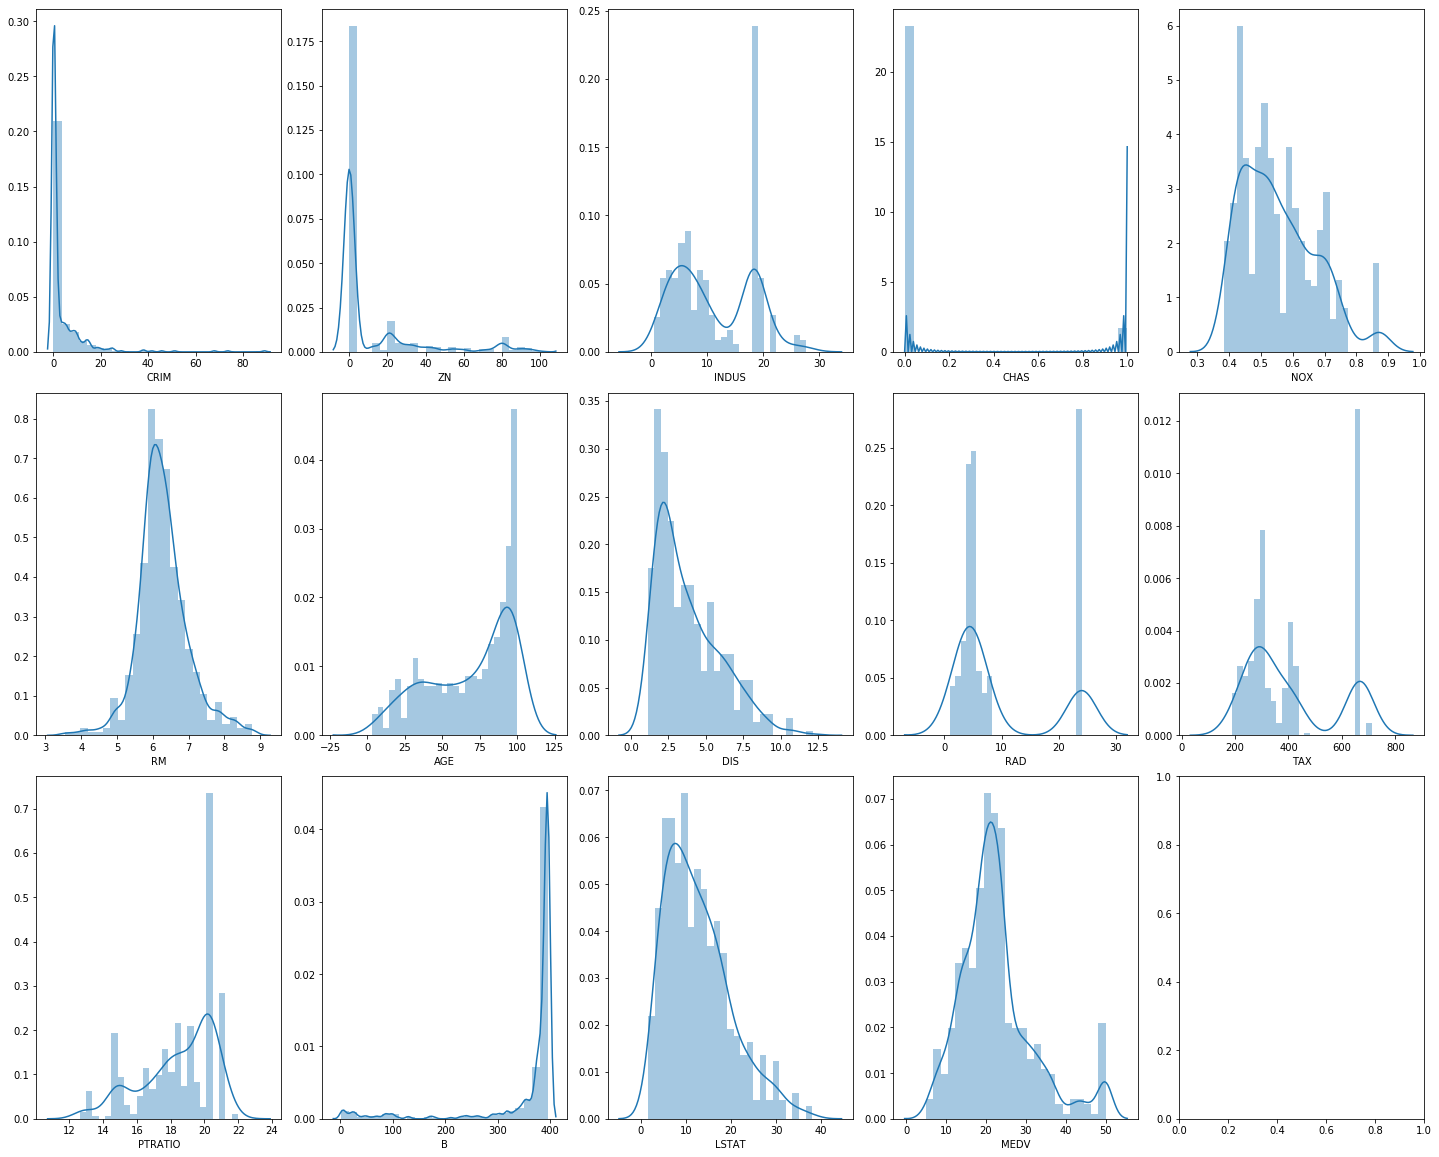

In [10]:
fig, axs = plt.subplots(nrows=3, ncols=5, figsize=(20,16))
fig.tight_layout(h_pad=2, w_pad=1)
sns.distplot(df['CRIM'], bins=25, ax=axs[0, 0])
sns.distplot(df['ZN'], bins=25, ax=axs[0, 1])
sns.distplot(df['INDUS'], bins=25, ax=axs[0, 2])
sns.distplot(df['CHAS'], bins=25, ax=axs[0, 3])
sns.distplot(df['NOX'], bins=25, ax=axs[0, 4])
sns.distplot(df['RM'], bins=25, ax=axs[1, 0])
sns.distplot(df['AGE'], bins=25, ax=axs[1, 1])
sns.distplot(df['DIS'], bins=25, ax=axs[1, 2])
sns.distplot(df['RAD'], bins=25, ax=axs[1, 3])
sns.distplot(df['TAX'], bins=25, ax=axs[1, 4])
sns.distplot(df['PTRATIO'], bins=25, ax=axs[2, 0])
sns.distplot(df['B'], bins=25, ax=axs[2, 1])
sns.distplot(df['LSTAT'], bins=25, ax=axs[2, 2])
sns.distplot(df['MEDV'], bins=25, ax=axs[2, 3])
plt.show()

From this we can see the distribution for each data column. We can see that the RM values are in a Gaussian Normal distribution. The values for CHAS are binomial with values of either 0 or 1. The distributions for DIS, LSTAT and NOX seem to follow the lognormal distribution.

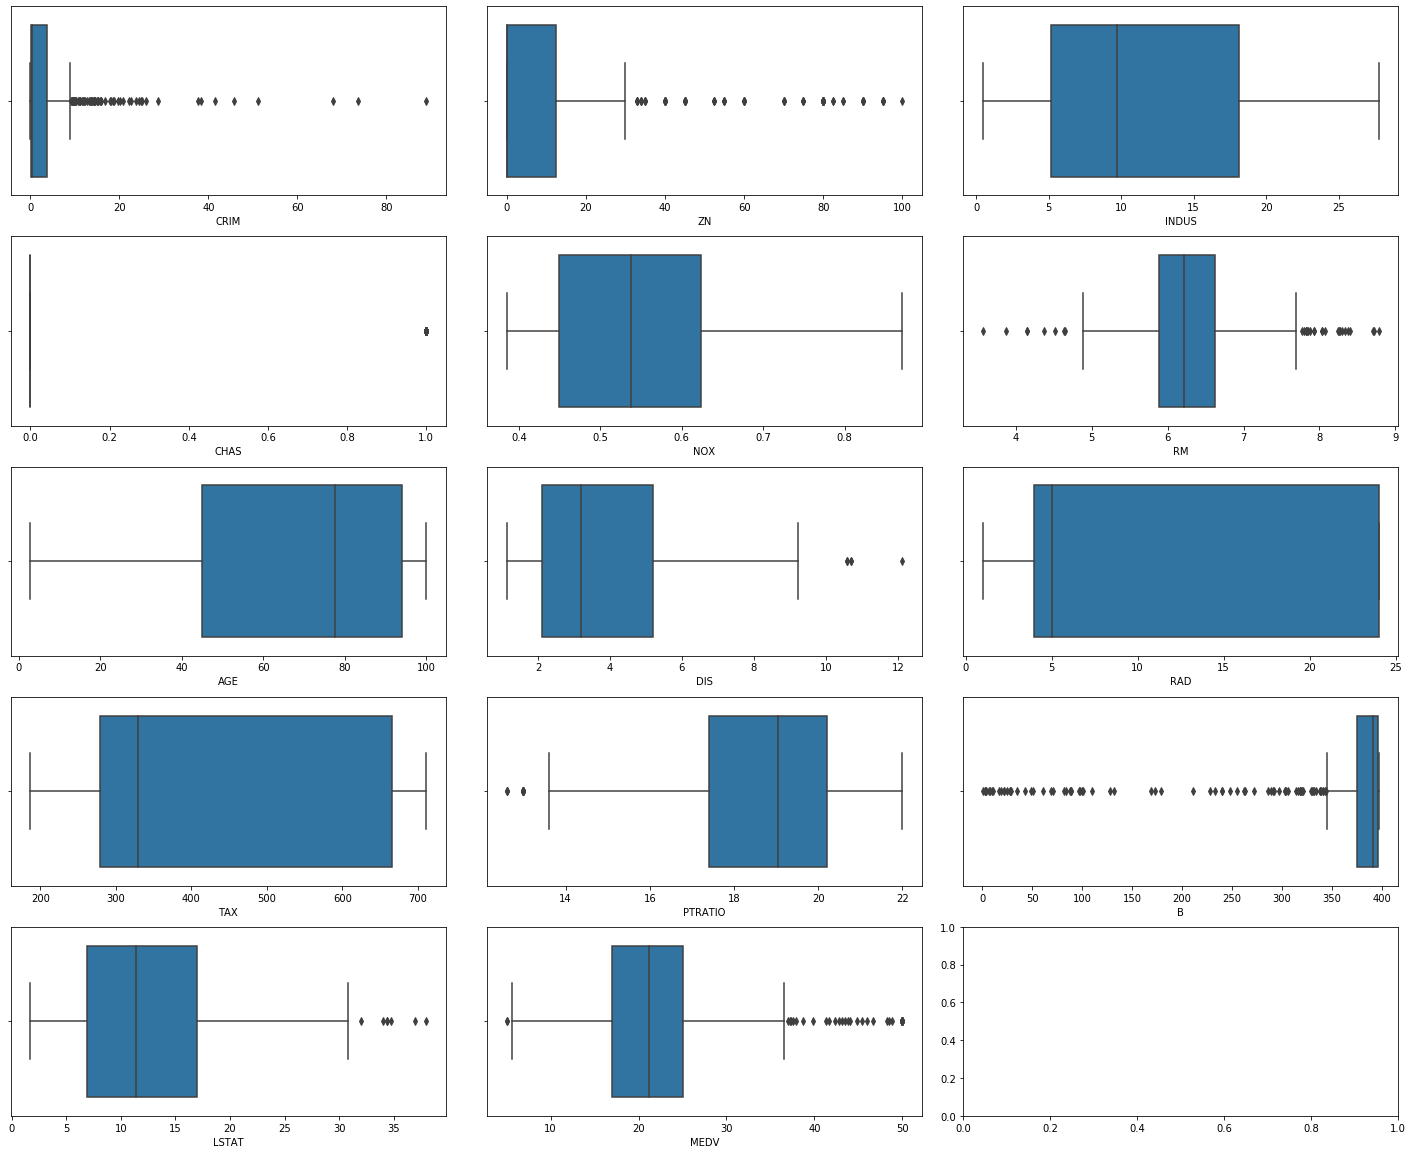

In [11]:
fig, axs = plt.subplots(nrows=5, ncols=3, figsize=(20,16))
fig.tight_layout(h_pad=2, w_pad=1)
sns.boxplot(x=df['CRIM'], ax=axs[0, 0])
sns.boxplot(x=df['ZN'], ax=axs[0, 1])
sns.boxplot(x=df['INDUS'], ax=axs[0, 2])
sns.boxplot(x=df['CHAS'], ax=axs[1, 0])
sns.boxplot(x=df['NOX'], ax=axs[1, 1])
sns.boxplot(x=df['RM'], ax=axs[1, 2])
sns.boxplot(x=df['AGE'], ax=axs[2, 0])
sns.boxplot(x=df['DIS'], ax=axs[2, 1])
sns.boxplot(x=df['RAD'], ax=axs[2, 2])
sns.boxplot(x=df['TAX'], ax=axs[3, 0])
sns.boxplot(x=df['PTRATIO'], ax=axs[3, 1])
sns.boxplot(x=df['B'], ax=axs[3, 2])
sns.boxplot(x=df['LSTAT'], ax=axs[4, 0])
sns.boxplot(x=df['MEDV'], ax=axs[4, 1])
plt.show()

In [12]:
df.cov().round(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,73.987,-40.216,23.992,-0.122,0.420,-1.325,85.405,-6.877,46.848,844.822,5.399,-302.382,27.986,-30.719
ZN,-40.216,543.937,-85.413,-0.253,-1.396,5.113,-373.902,32.629,-63.349,-1236.454,-19.777,373.721,-68.783,77.315
INDUS,23.992,-85.413,47.064,0.110,0.607,-1.888,124.514,-10.228,35.550,833.360,5.692,-223.580,29.580,-30.521
CHAS,-0.122,-0.253,0.110,0.065,0.003,0.016,0.619,-0.053,-0.016,-1.523,-0.067,1.131,-0.098,0.409
NOX,0.420,-1.396,0.607,0.003,0.013,-0.025,2.386,-0.188,0.617,13.046,0.047,-4.021,0.489,-0.455
RM,-1.325,5.113,-1.888,0.016,-0.025,0.494,-4.752,0.304,-1.284,-34.583,-0.541,8.215,-3.080,4.493
AGE,85.405,-373.902,124.514,0.619,2.386,-4.752,792.358,-44.329,111.771,2402.690,15.937,-702.940,121.078,-97.589
DIS,-6.877,32.629,-10.228,-0.053,-0.188,0.304,-44.329,4.434,-9.068,-189.665,-1.060,56.040,-7.473,4.840
RAD,46.848,-63.349,35.550,-0.016,0.617,-1.284,111.771,-9.068,75.816,1335.757,8.761,-353.276,30.385,-30.561
TAX,844.822,-1236.454,833.360,-1.523,13.046,-34.583,2402.690,-189.665,1335.757,28404.759,168.153,-6797.911,654.715,-726.256


In [13]:
df.corr().round(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000,-0.200,0.407,-0.056,0.421,-0.219,0.353,-0.380,0.626,0.583,0.290,-0.385,0.456,-0.388
ZN,-0.200,1.000,-0.534,-0.043,-0.517,0.312,-0.570,0.664,-0.312,-0.315,-0.392,0.176,-0.413,0.360
INDUS,0.407,-0.534,1.000,0.063,0.764,-0.392,0.645,-0.708,0.595,0.721,0.383,-0.357,0.604,-0.484
CHAS,-0.056,-0.043,0.063,1.000,0.091,0.091,0.087,-0.099,-0.007,-0.036,-0.122,0.049,-0.054,0.175
NOX,0.421,-0.517,0.764,0.091,1.000,-0.302,0.731,-0.769,0.611,0.668,0.189,-0.380,0.591,-0.427
RM,-0.219,0.312,-0.392,0.091,-0.302,1.000,-0.240,0.205,-0.210,-0.292,-0.356,0.128,-0.614,0.695
AGE,0.353,-0.570,0.645,0.087,0.731,-0.240,1.000,-0.748,0.456,0.506,0.262,-0.274,0.602,-0.377
DIS,-0.380,0.664,-0.708,-0.099,-0.769,0.205,-0.748,1.000,-0.495,-0.534,-0.232,0.292,-0.497,0.250
RAD,0.626,-0.312,0.595,-0.007,0.611,-0.210,0.456,-0.495,1.000,0.910,0.465,-0.444,0.489,-0.382
TAX,0.583,-0.315,0.721,-0.036,0.668,-0.292,0.506,-0.534,0.910,1.000,0.461,-0.442,0.544,-0.469


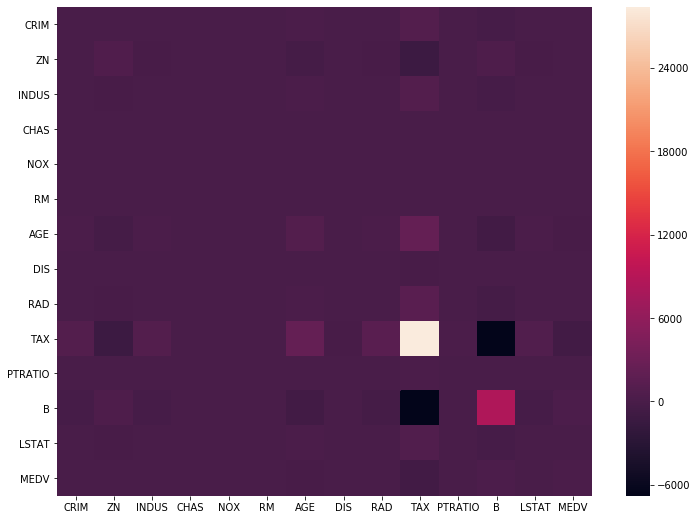

In [14]:
plt.subplots(figsize=(12,9))
covariance_matrix = df.cov().round(20)
sns.heatmap(data=covariance_matrix, annot=False)

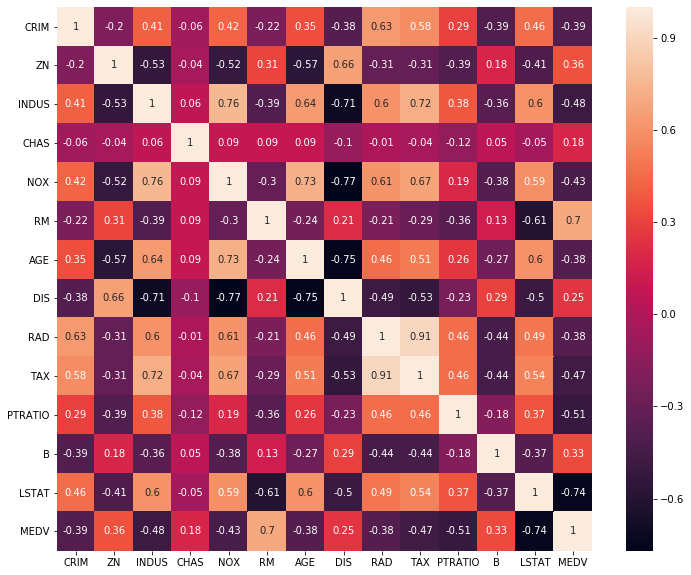

In [15]:
plt.subplots(figsize=(12,10))
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

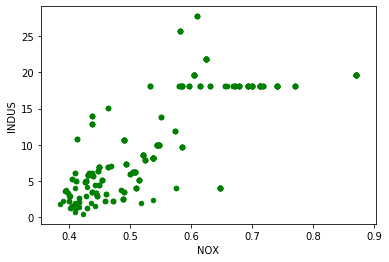

In [16]:
df.plot(kind='scatter',x='NOX',y='INDUS', color="green")
plt.show()

Looking at the correlations matrix results for TAX and RAD, we see a value of 0.91 returned. This would indicate a high correlation between the two variables. However when we look at a scatter plot between them we see that there are a couple of outlier values that skew the correlation results. Looking at the plot it is hard to see any real correlation between them. This example is useful to remind ourselves not to look at single aspects of analysis and jumping to conclusions.

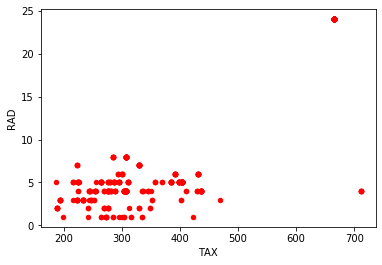

In [17]:
df.plot(kind='scatter',x='TAX',y='RAD', color="red")
plt.show()

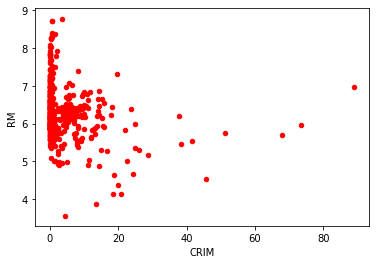

In [18]:
df.plot(kind='scatter',x='CRIM',y='RM',color='red')
plt.show()

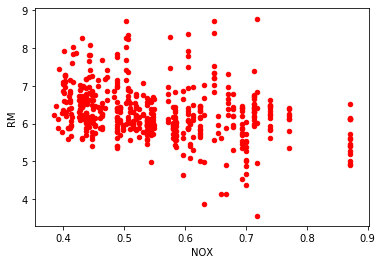

In [19]:
df.plot(kind='scatter',x='NOX',y='RM',color='red')
plt.show()

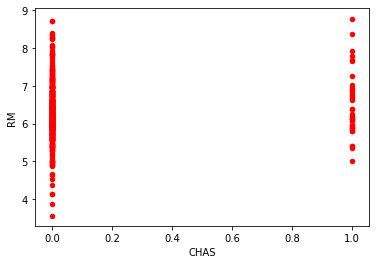

In [20]:
df.plot(kind='scatter',x='CHAS',y='RM',color='red')
plt.show()

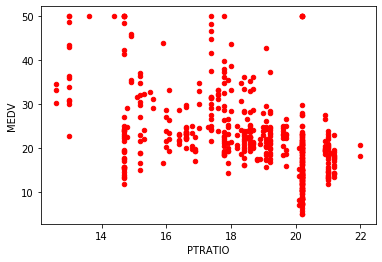

In [21]:
df.plot(kind='scatter',x='PTRATIO',y='MEDV',color='red')
plt.show()

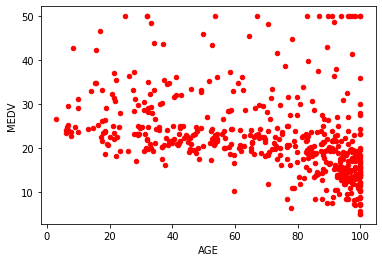

In [22]:
df.plot(kind='scatter',x='AGE',y='MEDV',color='red')
plt.show()

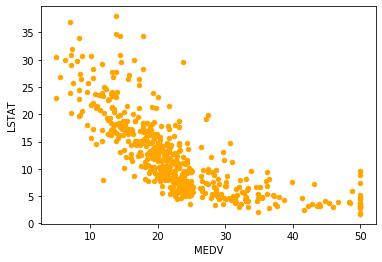

In [23]:
df.plot(kind='scatter',x='MEDV',y='LSTAT',color='orange')
plt.show()

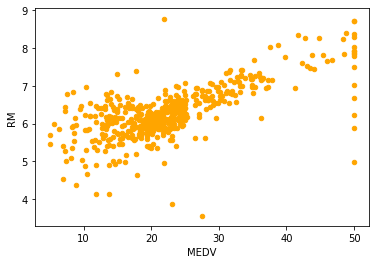

In [24]:
df.plot(kind='scatter',x='MEDV',y='RM',color='orange')
plt.show()

In [25]:
np.polyfit(df['MEDV'], df['LSTAT'], 1)

array([-0.57275582, 25.55885923])

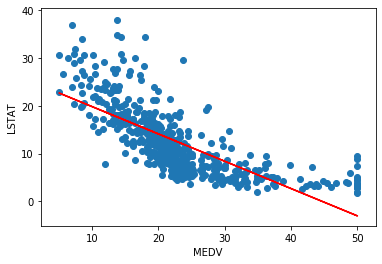

In [26]:
plt.plot(df['MEDV'], df['MEDV'] * -0.5727 + 25.55885, 'r-')
plt.scatter(df['MEDV'], df['LSTAT'])
plt.xlabel('MEDV')
plt.ylabel('LSTAT')
plt.show()

***
## Section 2 - Inferential

A ttest is a type of inferential statistics test used to determine if there is a significant different between the means of two groups of data which may be related in certain features.

For this experiment I want to see the ttest statistics and pvalues for each variable in the dataset run against the all of the others. From the initial analysis we can see there is no correlation between a lot of the variables but I still think it will be interesting to see this plotted.

In [27]:
df_results = pd.DataFrame(columns=['Var1', 'Var2','ttest Statistic','ttest Pvalue'])
df_results

,Var1,Var2,ttest Statistic,ttest Pvalue


In [28]:
#defining empty lists that will store the results of the ttest loop
v1 = []
v2 = []
S = []
P = []

In [29]:
# Creating a for loop that will run a tt for each variable against each other variable.
for column in df:
    for column1 in df:
        result = ss.ttest_ind(df[column], df[column1])
        #print(column, column1, result.statistic, result.pvalue)
        v1.append(column)
        v2.append(column1)
        S.append(result.statistic)
        P.append(result.pvalue)

In [30]:
df_results['Var1'] = v1
df_results['Var2'] = v2
df_results['ttest Statistic'] = S
df_results['ttest Pvalue'] = P
df_results

,Var1,Var2,ttest Statistic,ttest Pvalue
0,CRIM,CRIM,0.000000,1.000000e+00
1,CRIM,ZN,-7.013196,4.259687e-12
2,CRIM,INDUS,-15.381434,3.988806e-48
3,CRIM,CHAS,9.265024,1.141922e-19
4,CRIM,NOX,7.998610,3.430040e-15
5,CRIM,RM,-6.962202,6.024193e-12
6,CRIM,AGE,-49.646090,3.097115e-273
7,CRIM,DIS,-0.461087,6.448357e-01
8,CRIM,RAD,-10.909390,2.842063e-26
9,CRIM,TAX,-53.934427,1.251318e-299


In [31]:
# Removing the rows where the ttest was conducted on the same set of values eg ss.ttest_ind(CRIM, CRIM)
df_results = df_results.drop([0,15,30,45,60,75,90,105,120,135,150,165,180,195], axis=0)

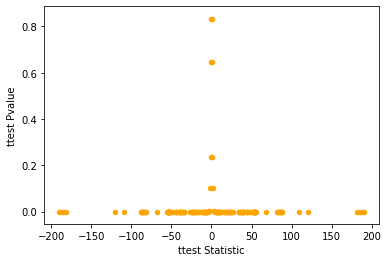

In [32]:
df_results.plot(kind='scatter',x='ttest Statistic',y='ttest Pvalue',color='orange')
plt.show()

Looking at this scatter plot, it looks like there are only 2 pairs of variables with a ttest pvalue above 0.5%, that might be significant. First we'll sort the data to find the tests where the P value is greater than 0.5%.

In [33]:
df_results.sort_values(by='ttest Pvalue', ascending=False).head(10)

,Var1,Var2,ttest Statistic,ttest Pvalue
29,INDUS,ZN,-0.209911,0.833780
16,ZN,INDUS,0.209911,0.833780
98,DIS,CRIM,0.461087,0.644836
7,CRIM,DIS,-0.461087,0.644836
169,LSTAT,ZN,1.189155,0.234658
26,ZN,LSTAT,-1.189155,0.234658
113,RAD,ZN,-1.639298,0.101463
22,ZN,RAD,1.639298,0.101463
36,INDUS,RAD,3.221156,0.001318
114,RAD,INDUS,-3.221156,0.001318


INDUS / ZN and DIS / CRIM are the two pairs of variables that indicate there is a relationship between them, based on the ttest results. We can plot these on a scatter plot to give us a different view to what is going on here.

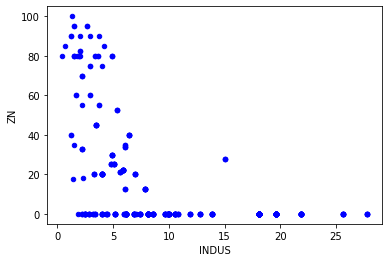

In [34]:
df.plot(kind='scatter',x='INDUS',y='ZN',color='blue')
plt.show()

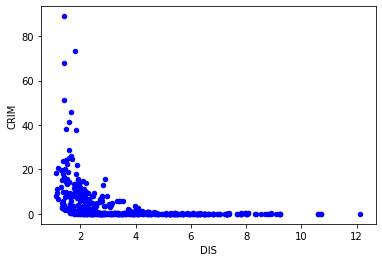

In [35]:
df.plot(kind='scatter',x='DIS',y='CRIM',color='blue')
plt.show()

From this, we could infer that as the proportion of non retail business per town (INDUS) increases the proportion of residential land zones (ZN) decreased. Similarly, as the distance to one of the Boston Employment Centre (DIS) increases, the per capaita crime rate decreases.

To look at the specific case of whether there is a signiﬁcant diﬀerence in median house prices between houses that are along the Charles river and those that aren’t, we can look at the ttest results for these two variables.

In [36]:
ss.ttest_ind(df['CHAS'], df['MEDV'])

Ttest_indResult(statistic=-54.9210289745203, pvalue=1.4651540072350996e-305)

From this result we would accept the null hypothesis and conclude that there is no significant relationship between these variables.

However it could also be useful to see these two variables in a scatter plot. (For the CHAS variable, 1 indicates that the house is along the Charles river while 0 means it is not)

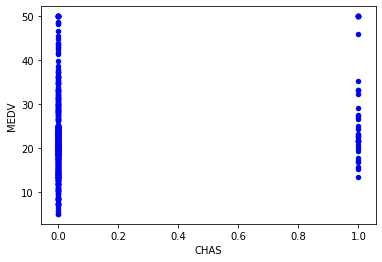

In [37]:
df.plot(kind='scatter',x='CHAS',y='MEDV',color='blue')
plt.show()

Looking at the scatter plot, it looks like the MEDV is pretty evenly distributed for both sets of values of CHAS. There are more houses in the lowest MEDV values when CHAS is 0 but if you were to pick any value of MEDV, it would not be possible to conclude if CHAS was 0 or 1.

In [38]:
# creating 2 dataframes based on the values of the CHAS variable
df_chas_0 = df[df['CHAS'] == 0]
df_chas_1 = df[df['CHAS'] == 1]

In [39]:
# Getting the mean values for all values in both new dataframes.
print (df_chas_0.mean())

CRIM         3.744447
ZN          11.634820
INDUS       11.019193
CHAS         0.000000
NOX          0.551817
RM           6.267174
AGE         67.911677
DIS          3.851915
RAD          9.566879
TAX        409.870488
PTRATIO     18.527176
B          355.461040
LSTAT       12.757941
MEDV        22.093843
dtype: float64


In [40]:
print (df_chas_1.mean())

CRIM         1.851670
ZN           7.714286
INDUS       12.719143
CHAS         1.000000
NOX          0.593426
RM           6.519600
AGE         77.500000
DIS          3.029709
RAD          9.314286
TAX        386.257143
PTRATIO     17.491429
B          372.997429
LSTAT       11.241714
MEDV        28.440000
dtype: float64


With these we can see that the average house price located along the Charles river is 28.4 (28,400 dollars) compared with 22.1 (22,100 dollars) for those not along the river.

The conclusion I would come to based on the information available is that although the average house prices are slightly higher located along the Charles river is no major correlation between MEDV and CHAS.

## Section 3 - Predict

To predict the house price we will first select what variables will be used. All variables could be used but if there is no relationship them and the MEDV variable, it may not be necessary. The results of the ttests can be looked at, specifically for MEDV. We will first look at them and sort ascending according to ttest Pvalue.

In [41]:
medv_results = df_results.loc[df_results['Var1'] == 'MEDV']

In [42]:
medv_results.sort_values(by='ttest Pvalue', ascending=False)

,Var1,Var2,ttest Statistic,ttest Pvalue
192,MEDV,PTRATIO,9.706960,2.332590e-21
183,MEDV,ZN,10.021561,1.337148e-22
194,MEDV,LSTAT,19.086255,1.381320e-69
184,MEDV,INDUS,22.341709,3.640811e-90
190,MEDV,RAD,23.059894,7.311700e-95
182,MEDV,CRIM,33.795968,4.137606e-168
188,MEDV,AGE,-34.973905,3.209462e-176
187,MEDV,RM,39.624611,6.490168e-208
189,MEDV,DIS,44.673237,2.033628e-241
191,MEDV,TAX,-51.403010,3.613063e-284


From this, it can be observed that although none of the variable have a ttest value above 5%, the top 5 variables that might indicate some relationship with MEDV are PTRATIO, ZN, LSTAT, INDUS and RAD. These 5 will be selected to try and predict the value of MEDV.

RM will also be added to the inputs as it could be observed from the scatter plot against MEDV there appears to be relationship between these. 

First the inputs and outputs will be declared.

In [63]:
inputs = df[['PTRATIO', 'ZN', 'LSTAT', 'INDUS', 'RAD', 'RM']]
inputsall = df[['PTRATIO', 'ZN', 'LSTAT', 'INDUS', 'RAD', 'CRIM', 'AGE', 'RM', 'DIS', 'TAX', 'NOX', 'CHAS', 'B']]
#inputs = df[['PTRATIO']]

In [44]:
outputs = df[['MEDV']]

In [83]:
# Start a neural network, building it by layers.
model = kr.models.Sequential()

# Add a hidden layer with 64 neurons and an input layer with 6.
model.add(kr.layers.Dense(64, input_dim=6, activation='relu'))
model.add(kr.layers.Dense(10, activation="relu"))
model.add(kr.layers.Dense(1, activation="linear"))

# Build the graph./ Try loss mean_squared_error as well.
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy', 'mae'])

In [46]:
# Split the inputs and outputs into training and test sets.
# inputs_train, inputs_test, outputs_train, outputs_test = mod.train_test_split(inputs, outputs, test_size=0.5)

In [84]:
# Train the neural network.
history = model.fit(inputs, outputs, validation_split=.2, epochs=1000, batch_size=30)

Train on 404 samples, validate on 102 samples
Epoch 1/1000
404/404 [==============================] - 0s 546us/step - loss: 492.7923 - accuracy: 0.0000e+00 - mae: 20.0116 - val_loss: 86.4939 - val_accuracy: 0.0000e+00 - val_mae: 7.6504
Epoch 2/1000
404/404 [==============================] - 0s 49us/step - loss: 358.7100 - accuracy: 0.0000e+00 - mae: 16.4320 - val_loss: 44.4840 - val_accuracy: 0.0000e+00 - val_mae: 5.2618
Epoch 3/1000
404/404 [==============================] - 0s 64us/step - loss: 245.0981 - accuracy: 0.0025 - mae: 12.7658 - val_loss: 59.4361 - val_accuracy: 0.0098 - val_mae: 6.4830
Epoch 4/1000
404/404 [==============================] - 0s 69us/step - loss: 162.8447 - accuracy: 0.0025 - mae: 9.7199 - val_loss: 149.9582 - val_accuracy: 0.0098 - val_mae: 10.6520
Epoch 5/1000
404/404 [==============================] - 0s 67us/step - loss: 140.9820 - accuracy: 0.0050 - mae: 8.9003 - val_loss: 201.1774 - val_accuracy: 0.0000e+00 - val_mae: 12.5667
Epoch 6/1000
404/404 [====

404/404 [==============================] - 0s 74us/step - loss: 29.9632 - accuracy: 0.0074 - mae: 4.1511 - val_loss: 22.6522 - val_accuracy: 0.0196 - val_mae: 3.7444
Epoch 46/1000
404/404 [==============================] - 0s 62us/step - loss: 29.9704 - accuracy: 0.0050 - mae: 4.1604 - val_loss: 24.5997 - val_accuracy: 0.0196 - val_mae: 3.9228
Epoch 47/1000
404/404 [==============================] - 0s 72us/step - loss: 30.6085 - accuracy: 0.0149 - mae: 4.0758 - val_loss: 31.3533 - val_accuracy: 0.0000e+00 - val_mae: 4.5526
Epoch 48/1000
404/404 [==============================] - 0s 67us/step - loss: 28.4559 - accuracy: 0.0000e+00 - mae: 3.9983 - val_loss: 23.3161 - val_accuracy: 0.0196 - val_mae: 3.7955
Epoch 49/1000
404/404 [==============================] - 0s 54us/step - loss: 26.9193 - accuracy: 0.0074 - mae: 3.9323 - val_loss: 25.2499 - val_accuracy: 0.0098 - val_mae: 3.9921
Epoch 50/1000
404/404 [==============================] - 0s 52us/step - loss: 26.1051 - accuracy: 0.0074 -

404/404 [==============================] - 0s 49us/step - loss: 14.9468 - accuracy: 0.0149 - mae: 2.7044 - val_loss: 22.1841 - val_accuracy: 0.0098 - val_mae: 3.5346
Epoch 91/1000
404/404 [==============================] - 0s 57us/step - loss: 15.4853 - accuracy: 0.0099 - mae: 2.7579 - val_loss: 20.7000 - val_accuracy: 0.0000e+00 - val_mae: 3.4135
Epoch 92/1000
404/404 [==============================] - 0s 52us/step - loss: 15.0170 - accuracy: 0.0198 - mae: 2.6911 - val_loss: 20.6538 - val_accuracy: 0.0000e+00 - val_mae: 3.4009
Epoch 93/1000
404/404 [==============================] - 0s 57us/step - loss: 15.1089 - accuracy: 0.0223 - mae: 2.7236 - val_loss: 21.3728 - val_accuracy: 0.0000e+00 - val_mae: 3.4498
Epoch 94/1000
404/404 [==============================] - 0s 59us/step - loss: 14.7491 - accuracy: 0.0074 - mae: 2.6949 - val_loss: 23.6177 - val_accuracy: 0.0098 - val_mae: 3.6693
Epoch 95/1000
404/404 [==============================] - 0s 59us/step - loss: 14.6916 - accuracy: 0.00

Epoch 135/1000
404/404 [==============================] - 0s 74us/step - loss: 14.3342 - accuracy: 0.0149 - mae: 2.6314 - val_loss: 21.2682 - val_accuracy: 0.0000e+00 - val_mae: 3.4302
Epoch 136/1000
404/404 [==============================] - 0s 69us/step - loss: 14.1060 - accuracy: 0.0173 - mae: 2.5886 - val_loss: 19.6554 - val_accuracy: 0.0196 - val_mae: 3.3082
Epoch 137/1000
404/404 [==============================] - 0s 62us/step - loss: 14.2816 - accuracy: 0.0173 - mae: 2.5817 - val_loss: 19.1803 - val_accuracy: 0.0196 - val_mae: 3.2623
Epoch 138/1000
404/404 [==============================] - 0s 59us/step - loss: 14.0325 - accuracy: 0.0198 - mae: 2.5571 - val_loss: 20.6685 - val_accuracy: 0.0000e+00 - val_mae: 3.3894
Epoch 139/1000
404/404 [==============================] - 0s 62us/step - loss: 13.9013 - accuracy: 0.0173 - mae: 2.5515 - val_loss: 20.0583 - val_accuracy: 0.0000e+00 - val_mae: 3.3427
Epoch 140/1000
404/404 [==============================] - 0s 67us/step - loss: 13.8

Epoch 180/1000
404/404 [==============================] - 0s 62us/step - loss: 13.5233 - accuracy: 0.0149 - mae: 2.4840 - val_loss: 20.3492 - val_accuracy: 0.0196 - val_mae: 3.3554
Epoch 181/1000
404/404 [==============================] - 0s 67us/step - loss: 13.8798 - accuracy: 0.0223 - mae: 2.5773 - val_loss: 20.4537 - val_accuracy: 0.0098 - val_mae: 3.3339
Epoch 182/1000
404/404 [==============================] - 0s 62us/step - loss: 13.4127 - accuracy: 0.0173 - mae: 2.4990 - val_loss: 20.5045 - val_accuracy: 0.0196 - val_mae: 3.3377
Epoch 183/1000
404/404 [==============================] - 0s 69us/step - loss: 13.3324 - accuracy: 0.0198 - mae: 2.4907 - val_loss: 20.4246 - val_accuracy: 0.0196 - val_mae: 3.3442
Epoch 184/1000
404/404 [==============================] - 0s 67us/step - loss: 13.4178 - accuracy: 0.0173 - mae: 2.5011 - val_loss: 21.2838 - val_accuracy: 0.0000e+00 - val_mae: 3.3975
Epoch 185/1000
404/404 [==============================] - 0s 59us/step - loss: 13.6185 - ac

Epoch 225/1000
404/404 [==============================] - 0s 64us/step - loss: 12.9203 - accuracy: 0.0124 - mae: 2.4360 - val_loss: 20.4330 - val_accuracy: 0.0196 - val_mae: 3.3175
Epoch 226/1000
404/404 [==============================] - 0s 62us/step - loss: 13.2229 - accuracy: 0.0173 - mae: 2.4987 - val_loss: 20.5779 - val_accuracy: 0.0000e+00 - val_mae: 3.3234
Epoch 227/1000
404/404 [==============================] - 0s 54us/step - loss: 13.0508 - accuracy: 0.0149 - mae: 2.4713 - val_loss: 21.4991 - val_accuracy: 0.0000e+00 - val_mae: 3.4000
Epoch 228/1000
404/404 [==============================] - 0s 54us/step - loss: 13.0769 - accuracy: 0.0198 - mae: 2.4412 - val_loss: 20.6809 - val_accuracy: 0.0196 - val_mae: 3.3206
Epoch 229/1000
404/404 [==============================] - 0s 62us/step - loss: 13.3768 - accuracy: 0.0149 - mae: 2.4992 - val_loss: 21.9711 - val_accuracy: 0.0000e+00 - val_mae: 3.4377
Epoch 230/1000
404/404 [==============================] - 0s 69us/step - loss: 13.1

Epoch 270/1000
404/404 [==============================] - 0s 59us/step - loss: 12.7716 - accuracy: 0.0198 - mae: 2.4532 - val_loss: 21.7836 - val_accuracy: 0.0000e+00 - val_mae: 3.4389
Epoch 271/1000
404/404 [==============================] - 0s 69us/step - loss: 13.0673 - accuracy: 0.0149 - mae: 2.4813 - val_loss: 20.4203 - val_accuracy: 0.0098 - val_mae: 3.2995
Epoch 272/1000
404/404 [==============================] - 0s 62us/step - loss: 12.7809 - accuracy: 0.0173 - mae: 2.4585 - val_loss: 22.0759 - val_accuracy: 0.0000e+00 - val_mae: 3.4332
Epoch 273/1000
404/404 [==============================] - 0s 67us/step - loss: 12.6459 - accuracy: 0.0173 - mae: 2.4291 - val_loss: 20.8161 - val_accuracy: 0.0098 - val_mae: 3.3226
Epoch 274/1000
404/404 [==============================] - 0s 62us/step - loss: 12.6440 - accuracy: 0.0223 - mae: 2.4065 - val_loss: 20.3902 - val_accuracy: 0.0196 - val_mae: 3.2943
Epoch 275/1000
404/404 [==============================] - 0s 67us/step - loss: 13.2506 

Epoch 315/1000
404/404 [==============================] - 0s 64us/step - loss: 12.5691 - accuracy: 0.0149 - mae: 2.4436 - val_loss: 19.7497 - val_accuracy: 0.0196 - val_mae: 3.2451
Epoch 316/1000
404/404 [==============================] - 0s 74us/step - loss: 12.7150 - accuracy: 0.0149 - mae: 2.4281 - val_loss: 21.2217 - val_accuracy: 0.0000e+00 - val_mae: 3.3926
Epoch 317/1000
404/404 [==============================] - 0s 67us/step - loss: 12.4201 - accuracy: 0.0198 - mae: 2.4295 - val_loss: 20.7646 - val_accuracy: 0.0098 - val_mae: 3.2991
Epoch 318/1000
404/404 [==============================] - 0s 62us/step - loss: 12.3888 - accuracy: 0.0124 - mae: 2.3761 - val_loss: 19.9915 - val_accuracy: 0.0196 - val_mae: 3.2553
Epoch 319/1000
404/404 [==============================] - 0s 50us/step - loss: 12.3464 - accuracy: 0.0223 - mae: 2.3864 - val_loss: 20.8461 - val_accuracy: 0.0000e+00 - val_mae: 3.3189
Epoch 320/1000
404/404 [==============================] - 0s 62us/step - loss: 12.1990 

Epoch 360/1000
404/404 [==============================] - 0s 67us/step - loss: 12.0468 - accuracy: 0.0198 - mae: 2.3760 - val_loss: 20.3637 - val_accuracy: 0.0098 - val_mae: 3.2750
Epoch 361/1000
404/404 [==============================] - 0s 79us/step - loss: 11.9127 - accuracy: 0.0149 - mae: 2.3462 - val_loss: 20.0722 - val_accuracy: 0.0196 - val_mae: 3.2439
Epoch 362/1000
404/404 [==============================] - 0s 74us/step - loss: 11.9675 - accuracy: 0.0149 - mae: 2.3673 - val_loss: 21.3928 - val_accuracy: 0.0000e+00 - val_mae: 3.3870
Epoch 363/1000
404/404 [==============================] - 0s 67us/step - loss: 12.3269 - accuracy: 0.0223 - mae: 2.4232 - val_loss: 20.8960 - val_accuracy: 0.0098 - val_mae: 3.2988
Epoch 364/1000
404/404 [==============================] - 0s 67us/step - loss: 11.9167 - accuracy: 0.0198 - mae: 2.3301 - val_loss: 20.0364 - val_accuracy: 0.0196 - val_mae: 3.2640
Epoch 365/1000
404/404 [==============================] - 0s 62us/step - loss: 12.2082 - ac

Epoch 405/1000
404/404 [==============================] - 0s 69us/step - loss: 11.7946 - accuracy: 0.0173 - mae: 2.3419 - val_loss: 20.3688 - val_accuracy: 0.0196 - val_mae: 3.2776
Epoch 406/1000
404/404 [==============================] - 0s 72us/step - loss: 12.1046 - accuracy: 0.0124 - mae: 2.3832 - val_loss: 21.6999 - val_accuracy: 0.0098 - val_mae: 3.3557
Epoch 407/1000
404/404 [==============================] - 0s 57us/step - loss: 11.6478 - accuracy: 0.0099 - mae: 2.3284 - val_loss: 20.5315 - val_accuracy: 0.0196 - val_mae: 3.2803
Epoch 408/1000
404/404 [==============================] - 0s 64us/step - loss: 11.8708 - accuracy: 0.0198 - mae: 2.3377 - val_loss: 21.1242 - val_accuracy: 0.0196 - val_mae: 3.3267
Epoch 409/1000
404/404 [==============================] - 0s 54us/step - loss: 12.1680 - accuracy: 0.0297 - mae: 2.3762 - val_loss: 20.1207 - val_accuracy: 0.0196 - val_mae: 3.2445
Epoch 410/1000
404/404 [==============================] - 0s 52us/step - loss: 12.1767 - accura

404/404 [==============================] - 0s 69us/step - loss: 11.3632 - accuracy: 0.0050 - mae: 2.2881 - val_loss: 19.3020 - val_accuracy: 0.0196 - val_mae: 3.2552
Epoch 451/1000
404/404 [==============================] - 0s 69us/step - loss: 11.9940 - accuracy: 0.0149 - mae: 2.3627 - val_loss: 19.3250 - val_accuracy: 0.0196 - val_mae: 3.2330
Epoch 452/1000
404/404 [==============================] - 0s 69us/step - loss: 11.3106 - accuracy: 0.0198 - mae: 2.2938 - val_loss: 22.5165 - val_accuracy: 0.0098 - val_mae: 3.4499
Epoch 453/1000
404/404 [==============================] - 0s 67us/step - loss: 11.6373 - accuracy: 0.0223 - mae: 2.3418 - val_loss: 20.0374 - val_accuracy: 0.0098 - val_mae: 3.3188
Epoch 454/1000
404/404 [==============================] - 0s 62us/step - loss: 11.7439 - accuracy: 0.0248 - mae: 2.3711 - val_loss: 19.3434 - val_accuracy: 0.0098 - val_mae: 3.3018
Epoch 455/1000
404/404 [==============================] - 0s 59us/step - loss: 12.1751 - accuracy: 0.0272 - ma

404/404 [==============================] - 0s 62us/step - loss: 11.1974 - accuracy: 0.0074 - mae: 2.2929 - val_loss: 21.8039 - val_accuracy: 0.0098 - val_mae: 3.3559
Epoch 496/1000
404/404 [==============================] - 0s 72us/step - loss: 11.1492 - accuracy: 0.0272 - mae: 2.3014 - val_loss: 20.0998 - val_accuracy: 0.0196 - val_mae: 3.3017
Epoch 497/1000
404/404 [==============================] - 0s 62us/step - loss: 11.4516 - accuracy: 0.0173 - mae: 2.3421 - val_loss: 20.1638 - val_accuracy: 0.0098 - val_mae: 3.2817
Epoch 498/1000
404/404 [==============================] - 0s 57us/step - loss: 11.3995 - accuracy: 0.0099 - mae: 2.3224 - val_loss: 19.9745 - val_accuracy: 0.0098 - val_mae: 3.3003
Epoch 499/1000
404/404 [==============================] - 0s 49us/step - loss: 11.2474 - accuracy: 0.0173 - mae: 2.2736 - val_loss: 20.1198 - val_accuracy: 0.0196 - val_mae: 3.2531
Epoch 500/1000
404/404 [==============================] - 0s 57us/step - loss: 11.1412 - accuracy: 0.0149 - ma

Epoch 540/1000
404/404 [==============================] - 0s 74us/step - loss: 11.9259 - accuracy: 0.0149 - mae: 2.4503 - val_loss: 20.2980 - val_accuracy: 0.0196 - val_mae: 3.3055
Epoch 541/1000
404/404 [==============================] - 0s 69us/step - loss: 12.6972 - accuracy: 0.0248 - mae: 2.5249 - val_loss: 21.1212 - val_accuracy: 0.0196 - val_mae: 3.3223
Epoch 542/1000
404/404 [==============================] - 0s 57us/step - loss: 11.2893 - accuracy: 0.0124 - mae: 2.3200 - val_loss: 20.4108 - val_accuracy: 0.0196 - val_mae: 3.2695
Epoch 543/1000
404/404 [==============================] - 0s 62us/step - loss: 11.0513 - accuracy: 0.0149 - mae: 2.2777 - val_loss: 20.2279 - val_accuracy: 0.0196 - val_mae: 3.2668
Epoch 544/1000
404/404 [==============================] - 0s 69us/step - loss: 11.2688 - accuracy: 0.0124 - mae: 2.3228 - val_loss: 21.7532 - val_accuracy: 0.0196 - val_mae: 3.3480
Epoch 545/1000
404/404 [==============================] - 0s 69us/step - loss: 11.6315 - accura

404/404 [==============================] - 0s 59us/step - loss: 11.3029 - accuracy: 0.0099 - mae: 2.3291 - val_loss: 21.6591 - val_accuracy: 0.0196 - val_mae: 3.3391
Epoch 586/1000
404/404 [==============================] - 0s 69us/step - loss: 10.9908 - accuracy: 0.0099 - mae: 2.2698 - val_loss: 20.4978 - val_accuracy: 0.0196 - val_mae: 3.2772
Epoch 587/1000
404/404 [==============================] - 0s 57us/step - loss: 10.8550 - accuracy: 0.0124 - mae: 2.2543 - val_loss: 19.6576 - val_accuracy: 0.0098 - val_mae: 3.3132
Epoch 588/1000
404/404 [==============================] - 0s 54us/step - loss: 11.3080 - accuracy: 0.0173 - mae: 2.3482 - val_loss: 20.8200 - val_accuracy: 0.0196 - val_mae: 3.2880
Epoch 589/1000
404/404 [==============================] - 0s 47us/step - loss: 11.2513 - accuracy: 0.0149 - mae: 2.2942 - val_loss: 19.8649 - val_accuracy: 0.0098 - val_mae: 3.2998
Epoch 590/1000
404/404 [==============================] - 0s 54us/step - loss: 10.6086 - accuracy: 0.0149 - ma

404/404 [==============================] - 0s 72us/step - loss: 10.8131 - accuracy: 0.0223 - mae: 2.2670 - val_loss: 20.8018 - val_accuracy: 0.0196 - val_mae: 3.3015
Epoch 631/1000
404/404 [==============================] - 0s 69us/step - loss: 10.9951 - accuracy: 0.0223 - mae: 2.2938 - val_loss: 20.1466 - val_accuracy: 0.0098 - val_mae: 3.2966
Epoch 632/1000
404/404 [==============================] - 0s 72us/step - loss: 10.6191 - accuracy: 0.0173 - mae: 2.2376 - val_loss: 20.2559 - val_accuracy: 0.0098 - val_mae: 3.3396
Epoch 633/1000
404/404 [==============================] - 0s 69us/step - loss: 10.9916 - accuracy: 0.0149 - mae: 2.2776 - val_loss: 20.6225 - val_accuracy: 0.0196 - val_mae: 3.3230
Epoch 634/1000
404/404 [==============================] - 0s 72us/step - loss: 10.9390 - accuracy: 0.0149 - mae: 2.2730 - val_loss: 20.6339 - val_accuracy: 0.0196 - val_mae: 3.3045
Epoch 635/1000
404/404 [==============================] - 0s 62us/step - loss: 10.4704 - accuracy: 0.0173 - ma

404/404 [==============================] - 0s 69us/step - loss: 10.3281 - accuracy: 0.0124 - mae: 2.2037 - val_loss: 20.5122 - val_accuracy: 0.0196 - val_mae: 3.2910
Epoch 676/1000
404/404 [==============================] - 0s 67us/step - loss: 10.6027 - accuracy: 0.0198 - mae: 2.2451 - val_loss: 21.1885 - val_accuracy: 0.0196 - val_mae: 3.3501
Epoch 677/1000
404/404 [==============================] - 0s 67us/step - loss: 10.3042 - accuracy: 0.0223 - mae: 2.1984 - val_loss: 20.3038 - val_accuracy: 0.0098 - val_mae: 3.3214
Epoch 678/1000
404/404 [==============================] - 0s 57us/step - loss: 10.5895 - accuracy: 0.0198 - mae: 2.2144 - val_loss: 20.9514 - val_accuracy: 0.0196 - val_mae: 3.3229
Epoch 679/1000
404/404 [==============================] - 0s 62us/step - loss: 10.5554 - accuracy: 0.0322 - mae: 2.2388 - val_loss: 20.5755 - val_accuracy: 0.0098 - val_mae: 3.3447
Epoch 680/1000
404/404 [==============================] - 0s 69us/step - loss: 10.7673 - accuracy: 0.0173 - ma

404/404 [==============================] - 0s 69us/step - loss: 10.6618 - accuracy: 0.0149 - mae: 2.3015 - val_loss: 21.3523 - val_accuracy: 0.0196 - val_mae: 3.3360
Epoch 721/1000
404/404 [==============================] - 0s 64us/step - loss: 10.3216 - accuracy: 0.0149 - mae: 2.2101 - val_loss: 20.3575 - val_accuracy: 0.0098 - val_mae: 3.3382
Epoch 722/1000
404/404 [==============================] - 0s 57us/step - loss: 10.2917 - accuracy: 0.0223 - mae: 2.1896 - val_loss: 20.4730 - val_accuracy: 0.0098 - val_mae: 3.3846
Epoch 723/1000
404/404 [==============================] - 0s 67us/step - loss: 10.2792 - accuracy: 0.0099 - mae: 2.1997 - val_loss: 21.6550 - val_accuracy: 0.0196 - val_mae: 3.3543
Epoch 724/1000
404/404 [==============================] - 0s 67us/step - loss: 11.1092 - accuracy: 0.0149 - mae: 2.3331 - val_loss: 22.1174 - val_accuracy: 0.0196 - val_mae: 3.3794
Epoch 725/1000
404/404 [==============================] - 0s 72us/step - loss: 11.5297 - accuracy: 0.0173 - ma

404/404 [==============================] - 0s 64us/step - loss: 10.0498 - accuracy: 0.0198 - mae: 2.1793 - val_loss: 21.4347 - val_accuracy: 0.0098 - val_mae: 3.4095
Epoch 766/1000
404/404 [==============================] - 0s 69us/step - loss: 10.3239 - accuracy: 0.0124 - mae: 2.2534 - val_loss: 21.4758 - val_accuracy: 0.0196 - val_mae: 3.3584
Epoch 767/1000
404/404 [==============================] - 0s 77us/step - loss: 10.0146 - accuracy: 0.0198 - mae: 2.1918 - val_loss: 20.8469 - val_accuracy: 0.0098 - val_mae: 3.4006
Epoch 768/1000
404/404 [==============================] - 0s 59us/step - loss: 9.9841 - accuracy: 0.0149 - mae: 2.1755 - val_loss: 21.5328 - val_accuracy: 0.0098 - val_mae: 3.3731
Epoch 769/1000
404/404 [==============================] - 0s 62us/step - loss: 10.1553 - accuracy: 0.0173 - mae: 2.1867 - val_loss: 20.9446 - val_accuracy: 0.0098 - val_mae: 3.4328
Epoch 770/1000
404/404 [==============================] - 0s 74us/step - loss: 10.0716 - accuracy: 0.0173 - mae

404/404 [==============================] - 0s 67us/step - loss: 9.9061 - accuracy: 0.0173 - mae: 2.1593 - val_loss: 23.4685 - val_accuracy: 0.0196 - val_mae: 3.4934
Epoch 811/1000
404/404 [==============================] - 0s 67us/step - loss: 9.6617 - accuracy: 0.0099 - mae: 2.1510 - val_loss: 22.6192 - val_accuracy: 0.0196 - val_mae: 3.4285
Epoch 812/1000
404/404 [==============================] - 0s 69us/step - loss: 9.8361 - accuracy: 0.0223 - mae: 2.1631 - val_loss: 21.3282 - val_accuracy: 0.0098 - val_mae: 3.3821
Epoch 813/1000
404/404 [==============================] - 0s 64us/step - loss: 10.0023 - accuracy: 0.0074 - mae: 2.2330 - val_loss: 24.5178 - val_accuracy: 0.0196 - val_mae: 3.5273
Epoch 814/1000
404/404 [==============================] - 0s 59us/step - loss: 10.0807 - accuracy: 0.0173 - mae: 2.1853 - val_loss: 22.9458 - val_accuracy: 0.0098 - val_mae: 3.4673
Epoch 815/1000
404/404 [==============================] - 0s 69us/step - loss: 9.8851 - accuracy: 0.0198 - mae: 2

404/404 [==============================] - 0s 86us/step - loss: 10.0335 - accuracy: 0.0124 - mae: 2.2111 - val_loss: 23.4404 - val_accuracy: 0.0196 - val_mae: 3.4782
Epoch 856/1000
404/404 [==============================] - 0s 81us/step - loss: 9.5600 - accuracy: 0.0149 - mae: 2.1353 - val_loss: 22.5627 - val_accuracy: 0.0098 - val_mae: 3.4727
Epoch 857/1000
404/404 [==============================] - 0s 86us/step - loss: 9.6200 - accuracy: 0.0223 - mae: 2.1470 - val_loss: 21.8848 - val_accuracy: 0.0098 - val_mae: 3.4334
Epoch 858/1000
404/404 [==============================] - 0s 89us/step - loss: 9.9762 - accuracy: 0.0198 - mae: 2.2267 - val_loss: 22.3611 - val_accuracy: 0.0098 - val_mae: 3.4313
Epoch 859/1000
404/404 [==============================] - 0s 81us/step - loss: 10.4694 - accuracy: 0.0149 - mae: 2.2719 - val_loss: 22.5919 - val_accuracy: 0.0196 - val_mae: 3.4639
Epoch 860/1000
404/404 [==============================] - 0s 86us/step - loss: 10.0014 - accuracy: 0.0173 - mae: 

404/404 [==============================] - 0s 64us/step - loss: 9.2918 - accuracy: 0.0198 - mae: 2.1376 - val_loss: 22.2871 - val_accuracy: 0.0098 - val_mae: 3.4217
Epoch 901/1000
404/404 [==============================] - 0s 62us/step - loss: 9.4635 - accuracy: 0.0223 - mae: 2.1305 - val_loss: 23.0528 - val_accuracy: 0.0098 - val_mae: 3.4951
Epoch 902/1000
404/404 [==============================] - 0s 64us/step - loss: 9.8402 - accuracy: 0.0248 - mae: 2.1815 - val_loss: 23.6978 - val_accuracy: 0.0098 - val_mae: 3.5336
Epoch 903/1000
404/404 [==============================] - 0s 54us/step - loss: 9.6235 - accuracy: 0.0272 - mae: 2.1896 - val_loss: 22.2150 - val_accuracy: 0.0098 - val_mae: 3.4577
Epoch 904/1000
404/404 [==============================] - 0s 44us/step - loss: 9.4218 - accuracy: 0.0248 - mae: 2.1549 - val_loss: 22.4150 - val_accuracy: 0.0000e+00 - val_mae: 3.5445
Epoch 905/1000
404/404 [==============================] - 0s 94us/step - loss: 9.6524 - accuracy: 0.0173 - mae:

404/404 [==============================] - 0s 72us/step - loss: 9.2030 - accuracy: 0.0173 - mae: 2.1381 - val_loss: 23.0133 - val_accuracy: 0.0098 - val_mae: 3.4905
Epoch 946/1000
404/404 [==============================] - 0s 96us/step - loss: 8.8316 - accuracy: 0.0248 - mae: 2.0678 - val_loss: 23.3687 - val_accuracy: 0.0098 - val_mae: 3.5196
Epoch 947/1000
404/404 [==============================] - 0s 86us/step - loss: 9.4276 - accuracy: 0.0198 - mae: 2.1531 - val_loss: 23.4931 - val_accuracy: 0.0098 - val_mae: 3.5383
Epoch 948/1000
404/404 [==============================] - 0s 86us/step - loss: 9.4712 - accuracy: 0.0223 - mae: 2.1763 - val_loss: 22.5317 - val_accuracy: 0.0000e+00 - val_mae: 3.6173
Epoch 949/1000
404/404 [==============================] - 0s 81us/step - loss: 9.8436 - accuracy: 0.0272 - mae: 2.1860 - val_loss: 22.4718 - val_accuracy: 0.0098 - val_mae: 3.4711
Epoch 950/1000
404/404 [==============================] - 0s 94us/step - loss: 9.3622 - accuracy: 0.0074 - mae:

404/404 [==============================] - 0s 62us/step - loss: 9.0995 - accuracy: 0.0223 - mae: 2.1149 - val_loss: 24.3514 - val_accuracy: 0.0196 - val_mae: 3.5383
Epoch 991/1000
404/404 [==============================] - 0s 72us/step - loss: 8.9209 - accuracy: 0.0149 - mae: 2.0968 - val_loss: 25.4010 - val_accuracy: 0.0196 - val_mae: 3.6035
Epoch 992/1000
404/404 [==============================] - 0s 62us/step - loss: 8.9699 - accuracy: 0.0248 - mae: 2.1107 - val_loss: 24.1265 - val_accuracy: 0.0098 - val_mae: 3.5711
Epoch 993/1000
404/404 [==============================] - 0s 62us/step - loss: 8.8783 - accuracy: 0.0272 - mae: 2.0707 - val_loss: 25.6316 - val_accuracy: 0.0098 - val_mae: 3.6463
Epoch 994/1000
404/404 [==============================] - 0s 57us/step - loss: 9.4315 - accuracy: 0.0223 - mae: 2.1723 - val_loss: 24.2943 - val_accuracy: 0.0098 - val_mae: 3.5518
Epoch 995/1000
404/404 [==============================] - 0s 52us/step - loss: 9.0279 - accuracy: 0.0198 - mae: 2.1

In [85]:
#p = model.predict(inputs_test.as_matrix()[0:1])
p = model.predict(inputs)

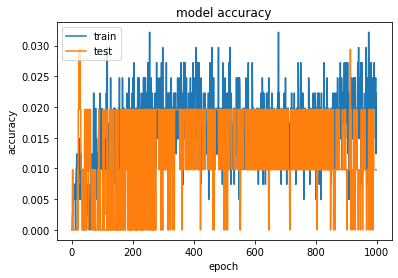

In [86]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

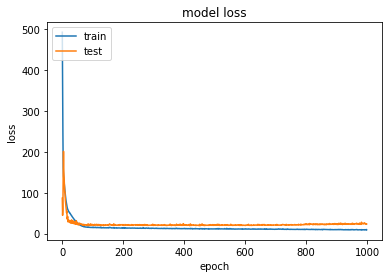

In [87]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

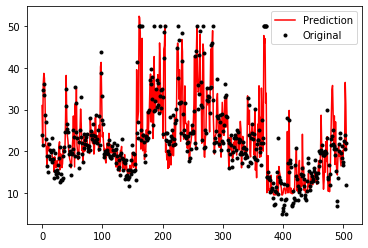

In [88]:
plt.plot(p, 'r-', label='Prediction')
plt.plot(outputs, 'k.', label='Original')
plt.legend()

### Pre processing & Whitening

Pre processing is a technique where the data input is standardised to fit a normally distibuted dataset i.e. Gaussian with zero mean and unit variance. The learning estimators used in scikit-learn may not return the most accurate results if the data doesn't fit this distribution.[3]

Whitening is a method to remove the correlation between variables that can sometimes be useful in predictions in neural networks.

In [57]:
inputsscale = pd.DataFrame(pre.scale(inputs), columns=inputs.columns)
inputsscale

,PTRATIO,ZN,LSTAT,INDUS,RAD,RM
0,-1.459000,0.284830,-1.075562,-1.287909,-0.982843,0.413672
1,-0.303094,-0.487722,-0.492439,-0.593381,-0.867883,0.194274
2,-0.303094,-0.487722,-1.208727,-0.593381,-0.867883,1.282714
3,0.113032,-0.487722,-1.361517,-1.306878,-0.752922,1.016303
4,0.113032,-0.487722,-1.026501,-1.306878,-0.752922,1.228577
5,0.113032,-0.487722,-1.043322,-1.306878,-0.752922,0.207096
6,-1.505237,0.048772,-0.031268,-0.476654,-0.523001,-0.388411
7,-1.505237,0.048772,0.910700,-0.476654,-0.523001,-0.160466
8,-1.505237,0.048772,2.421774,-0.476654,-0.523001,-0.931206
9,-1.505237,0.048772,0.623344,-0.476654,-0.523001,-0.399808


In [58]:
pca = dec.PCA(n_components=6, whiten=True)
pca.fit(inputsscale)
inputsscale_white = pd.DataFrame(pca.transform(inputsscale), columns=inputsscale.columns)
inputsscale_white

,PTRATIO,ZN,LSTAT,INDUS,RAD,RM
0,1.281734,-0.493090,-0.573601,-0.453632,-0.439274,1.034806
1,0.474774,-0.299547,-1.123941,0.162312,-0.276017,0.112677
2,0.882789,0.792994,-1.469129,0.124334,-0.024872,-0.184165
3,0.939005,0.679700,-1.387455,1.003484,-0.638212,0.480430
4,0.896590,0.729896,-1.321512,0.865258,-1.064328,-0.042626
5,0.690742,-0.059016,-1.190993,1.090785,-0.610419,0.911142
6,0.494851,-1.057353,-0.186110,-1.126918,-0.423808,0.901753
7,0.299689,-1.203217,0.048146,-1.435795,-1.464077,-0.230429
8,-0.247198,-2.321296,0.574389,-1.685542,-2.646592,-1.003901
9,0.324288,-1.290824,-0.000834,-1.304849,-1.074076,0.270764


In [59]:
# Train the neural network.
history2 = model.fit(inputsscale_white, outputs, validation_split=.2, epochs=200, batch_size=15)

Train on 404 samples, validate on 102 samples
Epoch 1/200
404/404 [==============================] - 3s 7ms/step - loss: 99.7534 - accuracy: 0.0050 - mae: 7.3190 - val_loss: 33.4932 - val_accuracy: 0.0098 - val_mae: 4.5434
Epoch 2/200
404/404 [==============================] - 0s 469us/step - loss: 51.0176 - accuracy: 0.0149 - mae: 5.1009 - val_loss: 21.5339 - val_accuracy: 0.0098 - val_mae: 3.8427
Epoch 3/200
404/404 [==============================] - 0s 188us/step - loss: 33.7452 - accuracy: 0.0149 - mae: 4.1449 - val_loss: 22.4393 - val_accuracy: 0.0000e+00 - val_mae: 3.8598
Epoch 4/200
404/404 [==============================] - 0s 108us/step - loss: 29.0210 - accuracy: 0.0124 - mae: 3.7412 - val_loss: 25.1834 - val_accuracy: 0.0196 - val_mae: 4.0698
Epoch 5/200
404/404 [==============================] - 0s 279us/step - loss: 28.4680 - accuracy: 0.0149 - mae: 3.7052 - val_loss: 29.8429 - val_accuracy: 0.0098 - val_mae: 4.4744
Epoch 6/200
404/404 [==============================] - 0s

404/404 [==============================] - 0s 84us/step - loss: 27.8378 - accuracy: 0.0149 - mae: 3.5349 - val_loss: 35.7869 - val_accuracy: 0.0098 - val_mae: 4.9686
Epoch 47/200
404/404 [==============================] - 0s 84us/step - loss: 27.7924 - accuracy: 0.0173 - mae: 3.6572 - val_loss: 37.1852 - val_accuracy: 0.0000e+00 - val_mae: 5.0730
Epoch 48/200
404/404 [==============================] - 0s 81us/step - loss: 27.8369 - accuracy: 0.0149 - mae: 3.5954 - val_loss: 36.7568 - val_accuracy: 0.0196 - val_mae: 5.0415
Epoch 49/200
404/404 [==============================] - 0s 268us/step - loss: 27.8293 - accuracy: 0.0099 - mae: 3.6725 - val_loss: 35.1000 - val_accuracy: 0.0098 - val_mae: 4.9084
Epoch 50/200
404/404 [==============================] - 0s 131us/step - loss: 28.0907 - accuracy: 0.0173 - mae: 3.6380 - val_loss: 35.2960 - val_accuracy: 0.0098 - val_mae: 4.9179
Epoch 51/200
404/404 [==============================] - 0s 118us/step - loss: 27.8392 - accuracy: 0.0124 - mae: 

404/404 [==============================] - 0s 91us/step - loss: 27.8255 - accuracy: 0.0198 - mae: 3.5849 - val_loss: 36.6324 - val_accuracy: 0.0098 - val_mae: 5.0244
Epoch 92/200
404/404 [==============================] - 0s 79us/step - loss: 27.7358 - accuracy: 0.0149 - mae: 3.6014 - val_loss: 36.0867 - val_accuracy: 0.0098 - val_mae: 4.9786
Epoch 93/200
404/404 [==============================] - 0s 84us/step - loss: 27.9131 - accuracy: 0.0198 - mae: 3.5934 - val_loss: 33.9760 - val_accuracy: 0.0098 - val_mae: 4.7999
Epoch 94/200
404/404 [==============================] - 0s 89us/step - loss: 27.6760 - accuracy: 0.0149 - mae: 3.6045 - val_loss: 36.3410 - val_accuracy: 0.0098 - val_mae: 5.0133
Epoch 95/200
404/404 [==============================] - 0s 101us/step - loss: 27.9071 - accuracy: 0.0149 - mae: 3.6720 - val_loss: 37.4422 - val_accuracy: 0.0098 - val_mae: 5.1063
Epoch 96/200
404/404 [==============================] - 0s 99us/step - loss: 27.8727 - accuracy: 0.0173 - mae: 3.5574

404/404 [==============================] - 0s 104us/step - loss: 27.7580 - accuracy: 0.0198 - mae: 3.6026 - val_loss: 38.5057 - val_accuracy: 0.0098 - val_mae: 5.1804
Epoch 137/200
404/404 [==============================] - 0s 111us/step - loss: 28.0096 - accuracy: 0.0198 - mae: 3.5989 - val_loss: 35.6637 - val_accuracy: 0.0098 - val_mae: 4.9427
Epoch 138/200
404/404 [==============================] - 0s 101us/step - loss: 27.9207 - accuracy: 0.0149 - mae: 3.5715 - val_loss: 35.1338 - val_accuracy: 0.0098 - val_mae: 4.9004
Epoch 139/200
404/404 [==============================] - 0s 109us/step - loss: 27.7693 - accuracy: 0.0198 - mae: 3.6346 - val_loss: 37.1348 - val_accuracy: 0.0098 - val_mae: 5.0706
Epoch 140/200
404/404 [==============================] - 0s 96us/step - loss: 28.1212 - accuracy: 0.0173 - mae: 3.6528 - val_loss: 38.1944 - val_accuracy: 0.0098 - val_mae: 5.1645
Epoch 141/200
404/404 [==============================] - 0s 89us/step - loss: 27.6634 - accuracy: 0.0173 - mae

404/404 [==============================] - 0s 111us/step - loss: 27.7759 - accuracy: 0.0124 - mae: 3.6037 - val_loss: 36.5808 - val_accuracy: 0.0098 - val_mae: 5.0137
Epoch 182/200
404/404 [==============================] - 0s 111us/step - loss: 27.8195 - accuracy: 0.0099 - mae: 3.5209 - val_loss: 33.5666 - val_accuracy: 0.0098 - val_mae: 4.7722
Epoch 183/200
404/404 [==============================] - 0s 106us/step - loss: 27.8449 - accuracy: 0.0198 - mae: 3.6164 - val_loss: 37.6336 - val_accuracy: 0.0000e+00 - val_mae: 5.1149
Epoch 184/200
404/404 [==============================] - 0s 84us/step - loss: 27.9808 - accuracy: 0.0124 - mae: 3.5782 - val_loss: 34.7799 - val_accuracy: 0.0098 - val_mae: 4.8698
Epoch 185/200
404/404 [==============================] - 0s 91us/step - loss: 28.1028 - accuracy: 0.0149 - mae: 3.6833 - val_loss: 38.5351 - val_accuracy: 0.0098 - val_mae: 5.1921
Epoch 186/200
404/404 [==============================] - 0s 79us/step - loss: 27.8837 - accuracy: 0.0198 - 

In [60]:
p2 = model.predict(inputsscale_white)
history2

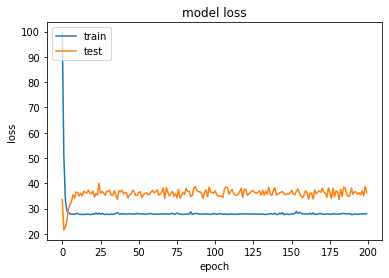

In [74]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

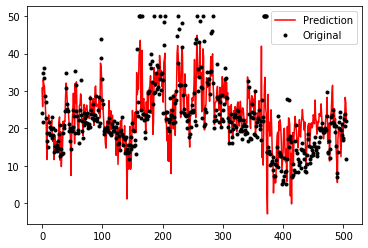

In [62]:
plt.plot(p2, 'r-', label='Prediction')
plt.plot(outputs, 'k.', label='Original')
plt.legend()

### All Inputs

In [76]:
# Start a neural network, building it by layers.
model = kr.models.Sequential()

# Add a hidden layer with 64 neurons and an input layer with 6.
model.add(kr.layers.Dense(64, input_dim=13, activation='relu'))
model.add(kr.layers.Dense(10, activation="relu"))
model.add(kr.layers.Dense(1, activation="linear"))

# Build the graph./ Try loss mean_squared_error as well.
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy', 'mae'])

In [77]:
history3 = model.fit(inputsall, outputs, validation_split=.2, epochs=1000, batch_size=30)

Train on 404 samples, validate on 102 samples
Epoch 1/1000
404/404 [==============================] - 0s 897us/step - loss: 32946.1663 - accuracy: 0.0000e+00 - mae: 174.6494 - val_loss: 8659.6544 - val_accuracy: 0.0000e+00 - val_mae: 90.0316
Epoch 2/1000
404/404 [==============================] - 0s 52us/step - loss: 4402.0276 - accuracy: 0.0000e+00 - mae: 62.5922 - val_loss: 331.1979 - val_accuracy: 0.0098 - val_mae: 15.6842
Epoch 3/1000
404/404 [==============================] - 0s 79us/step - loss: 727.1482 - accuracy: 0.0000e+00 - mae: 23.4843 - val_loss: 308.5660 - val_accuracy: 0.0000e+00 - val_mae: 14.4379
Epoch 4/1000
404/404 [==============================] - 0s 67us/step - loss: 318.9886 - accuracy: 0.0000e+00 - mae: 14.4516 - val_loss: 451.3874 - val_accuracy: 0.0000e+00 - val_mae: 17.4247
Epoch 5/1000
404/404 [==============================] - 0s 81us/step - loss: 245.4206 - accuracy: 0.0025 - mae: 12.1770 - val_loss: 343.1189 - val_accuracy: 0.0000e+00 - val_mae: 15.7741
E

404/404 [==============================] - 0s 69us/step - loss: 57.6364 - accuracy: 0.0074 - mae: 5.4337 - val_loss: 255.8054 - val_accuracy: 0.0098 - val_mae: 11.3693
Epoch 46/1000
404/404 [==============================] - 0s 64us/step - loss: 56.8919 - accuracy: 0.0099 - mae: 5.4325 - val_loss: 257.3061 - val_accuracy: 0.0098 - val_mae: 11.2933
Epoch 47/1000
404/404 [==============================] - 0s 72us/step - loss: 57.2051 - accuracy: 0.0025 - mae: 5.4240 - val_loss: 248.9426 - val_accuracy: 0.0000e+00 - val_mae: 11.0116
Epoch 48/1000
404/404 [==============================] - 0s 74us/step - loss: 56.9880 - accuracy: 0.0074 - mae: 5.5876 - val_loss: 253.3303 - val_accuracy: 0.0000e+00 - val_mae: 10.8592
Epoch 49/1000
404/404 [==============================] - 0s 67us/step - loss: 56.8532 - accuracy: 0.0025 - mae: 5.4149 - val_loss: 264.0942 - val_accuracy: 0.0098 - val_mae: 11.3649
Epoch 50/1000
404/404 [==============================] - 0s 62us/step - loss: 54.6501 - accuracy

Epoch 89/1000
404/404 [==============================] - 0s 62us/step - loss: 37.9577 - accuracy: 0.0025 - mae: 4.3098 - val_loss: 271.6638 - val_accuracy: 0.0000e+00 - val_mae: 11.7605
Epoch 90/1000
404/404 [==============================] - 0s 67us/step - loss: 37.9990 - accuracy: 0.0099 - mae: 4.3422 - val_loss: 279.6034 - val_accuracy: 0.0000e+00 - val_mae: 11.5770
Epoch 91/1000
404/404 [==============================] - 0s 86us/step - loss: 38.2679 - accuracy: 0.0124 - mae: 4.4590 - val_loss: 244.7766 - val_accuracy: 0.0000e+00 - val_mae: 11.0491
Epoch 92/1000
404/404 [==============================] - 0s 79us/step - loss: 38.3429 - accuracy: 0.0099 - mae: 4.3939 - val_loss: 235.9599 - val_accuracy: 0.0000e+00 - val_mae: 10.6897
Epoch 93/1000
404/404 [==============================] - 0s 74us/step - loss: 36.9888 - accuracy: 0.0099 - mae: 4.2842 - val_loss: 268.0693 - val_accuracy: 0.0000e+00 - val_mae: 11.8041
Epoch 94/1000
404/404 [==============================] - 0s 64us/step 

Epoch 133/1000
404/404 [==============================] - 0s 109us/step - loss: 29.5389 - accuracy: 0.0124 - mae: 3.9233 - val_loss: 158.7998 - val_accuracy: 0.0000e+00 - val_mae: 9.0518
Epoch 134/1000
404/404 [==============================] - 0s 77us/step - loss: 28.9838 - accuracy: 0.0050 - mae: 3.8812 - val_loss: 180.6212 - val_accuracy: 0.0000e+00 - val_mae: 9.5993
Epoch 135/1000
404/404 [==============================] - 0s 62us/step - loss: 28.2766 - accuracy: 0.0050 - mae: 3.9056 - val_loss: 174.7228 - val_accuracy: 0.0000e+00 - val_mae: 9.3971
Epoch 136/1000
404/404 [==============================] - 0s 59us/step - loss: 28.2897 - accuracy: 0.0050 - mae: 3.8958 - val_loss: 204.1062 - val_accuracy: 0.0000e+00 - val_mae: 10.4574
Epoch 137/1000
404/404 [==============================] - 0s 69us/step - loss: 28.3212 - accuracy: 0.0074 - mae: 3.8470 - val_loss: 184.4710 - val_accuracy: 0.0000e+00 - val_mae: 9.8487
Epoch 138/1000
404/404 [==============================] - 0s 72us/st

404/404 [==============================] - 0s 79us/step - loss: 25.4932 - accuracy: 0.0050 - mae: 3.6767 - val_loss: 140.8070 - val_accuracy: 0.0000e+00 - val_mae: 8.6297
Epoch 178/1000
404/404 [==============================] - 0s 72us/step - loss: 24.5093 - accuracy: 0.0124 - mae: 3.6307 - val_loss: 161.2090 - val_accuracy: 0.0000e+00 - val_mae: 9.2141
Epoch 179/1000
404/404 [==============================] - 0s 79us/step - loss: 23.8793 - accuracy: 0.0025 - mae: 3.6381 - val_loss: 163.4962 - val_accuracy: 0.0000e+00 - val_mae: 9.1944
Epoch 180/1000
404/404 [==============================] - 0s 69us/step - loss: 24.6957 - accuracy: 0.0074 - mae: 3.6974 - val_loss: 143.6758 - val_accuracy: 0.0098 - val_mae: 8.4844
Epoch 181/1000
404/404 [==============================] - 0s 72us/step - loss: 24.5856 - accuracy: 0.0074 - mae: 3.6300 - val_loss: 151.5334 - val_accuracy: 0.0000e+00 - val_mae: 8.7622
Epoch 182/1000
404/404 [==============================] - 0s 72us/step - loss: 24.5890 - 

Epoch 222/1000
404/404 [==============================] - 0s 74us/step - loss: 22.6805 - accuracy: 0.0025 - mae: 3.5579 - val_loss: 159.4595 - val_accuracy: 0.0000e+00 - val_mae: 9.2209
Epoch 223/1000
404/404 [==============================] - 0s 74us/step - loss: 23.4197 - accuracy: 0.0099 - mae: 3.5948 - val_loss: 116.8313 - val_accuracy: 0.0196 - val_mae: 7.9017
Epoch 224/1000
404/404 [==============================] - 0s 72us/step - loss: 23.2471 - accuracy: 0.0074 - mae: 3.4584 - val_loss: 113.3978 - val_accuracy: 0.0196 - val_mae: 7.6982
Epoch 225/1000
404/404 [==============================] - 0s 72us/step - loss: 21.9446 - accuracy: 0.0025 - mae: 3.4101 - val_loss: 136.1086 - val_accuracy: 0.0098 - val_mae: 8.5035
Epoch 226/1000
404/404 [==============================] - 0s 59us/step - loss: 20.9417 - accuracy: 0.0074 - mae: 3.3635 - val_loss: 118.0557 - val_accuracy: 0.0196 - val_mae: 7.8263
Epoch 227/1000
404/404 [==============================] - 0s 59us/step - loss: 20.8862

Epoch 267/1000
404/404 [==============================] - 0s 72us/step - loss: 18.4996 - accuracy: 0.0074 - mae: 3.0453 - val_loss: 103.9235 - val_accuracy: 0.0098 - val_mae: 7.4309
Epoch 268/1000
404/404 [==============================] - 0s 69us/step - loss: 19.0040 - accuracy: 0.0149 - mae: 3.2012 - val_loss: 95.4220 - val_accuracy: 0.0196 - val_mae: 7.1529
Epoch 269/1000
404/404 [==============================] - 0s 74us/step - loss: 17.8594 - accuracy: 0.0099 - mae: 3.0049 - val_loss: 77.4728 - val_accuracy: 0.0000e+00 - val_mae: 6.7763
Epoch 270/1000
404/404 [==============================] - 0s 59us/step - loss: 18.3774 - accuracy: 0.0124 - mae: 3.0420 - val_loss: 116.6601 - val_accuracy: 0.0196 - val_mae: 7.7221
Epoch 271/1000
404/404 [==============================] - 0s 62us/step - loss: 17.7092 - accuracy: 0.0149 - mae: 3.0453 - val_loss: 108.1127 - val_accuracy: 0.0098 - val_mae: 7.5485
Epoch 272/1000
404/404 [==============================] - 0s 52us/step - loss: 19.7774 -

404/404 [==============================] - 0s 57us/step - loss: 16.7726 - accuracy: 0.0149 - mae: 2.9069 - val_loss: 82.5960 - val_accuracy: 0.0000e+00 - val_mae: 6.9932
Epoch 312/1000
404/404 [==============================] - 0s 57us/step - loss: 16.8981 - accuracy: 0.0124 - mae: 2.8850 - val_loss: 98.3691 - val_accuracy: 0.0000e+00 - val_mae: 7.2816
Epoch 313/1000
404/404 [==============================] - 0s 69us/step - loss: 16.6806 - accuracy: 0.0198 - mae: 2.9391 - val_loss: 80.5977 - val_accuracy: 0.0098 - val_mae: 6.7911
Epoch 314/1000
404/404 [==============================] - 0s 62us/step - loss: 15.6092 - accuracy: 0.0173 - mae: 2.8149 - val_loss: 71.5137 - val_accuracy: 0.0000e+00 - val_mae: 6.7076
Epoch 315/1000
404/404 [==============================] - 0s 67us/step - loss: 16.5969 - accuracy: 0.0149 - mae: 2.8433 - val_loss: 67.7358 - val_accuracy: 0.0000e+00 - val_mae: 6.4497
Epoch 316/1000
404/404 [==============================] - 0s 69us/step - loss: 16.2786 - accur

404/404 [==============================] - 0s 72us/step - loss: 15.1280 - accuracy: 0.0074 - mae: 2.8267 - val_loss: 92.1297 - val_accuracy: 0.0098 - val_mae: 7.0311
Epoch 356/1000
404/404 [==============================] - 0s 67us/step - loss: 16.4948 - accuracy: 0.0248 - mae: 2.8472 - val_loss: 51.3345 - val_accuracy: 0.0000e+00 - val_mae: 5.8050
Epoch 357/1000
404/404 [==============================] - 0s 64us/step - loss: 21.5648 - accuracy: 0.0149 - mae: 3.3030 - val_loss: 91.7122 - val_accuracy: 0.0098 - val_mae: 7.0702
Epoch 358/1000
404/404 [==============================] - 0s 49us/step - loss: 18.5973 - accuracy: 0.0223 - mae: 3.0920 - val_loss: 138.1904 - val_accuracy: 0.0000e+00 - val_mae: 8.4107
Epoch 359/1000
404/404 [==============================] - 0s 57us/step - loss: 16.6054 - accuracy: 0.0248 - mae: 2.9619 - val_loss: 59.0454 - val_accuracy: 0.0000e+00 - val_mae: 6.2993
Epoch 360/1000
404/404 [==============================] - 0s 59us/step - loss: 14.9977 - accuracy

Epoch 400/1000
404/404 [==============================] - 0s 59us/step - loss: 15.2752 - accuracy: 0.0223 - mae: 2.7648 - val_loss: 64.3013 - val_accuracy: 0.0196 - val_mae: 6.0496
Epoch 401/1000
404/404 [==============================] - 0s 57us/step - loss: 17.1406 - accuracy: 0.0223 - mae: 2.9565 - val_loss: 50.9845 - val_accuracy: 0.0000e+00 - val_mae: 5.8743
Epoch 402/1000
404/404 [==============================] - 0s 57us/step - loss: 16.2329 - accuracy: 0.0198 - mae: 2.8703 - val_loss: 106.4156 - val_accuracy: 0.0098 - val_mae: 7.5317
Epoch 403/1000
404/404 [==============================] - 0s 54us/step - loss: 15.5682 - accuracy: 0.0149 - mae: 2.8635 - val_loss: 88.6100 - val_accuracy: 0.0196 - val_mae: 7.0190
Epoch 404/1000
404/404 [==============================] - 0s 54us/step - loss: 14.2318 - accuracy: 0.0248 - mae: 2.6290 - val_loss: 65.7361 - val_accuracy: 0.0098 - val_mae: 6.2326
Epoch 405/1000
404/404 [==============================] - 0s 52us/step - loss: 13.9204 - a

Epoch 445/1000
404/404 [==============================] - 0s 69us/step - loss: 13.4801 - accuracy: 0.0074 - mae: 2.5950 - val_loss: 52.0829 - val_accuracy: 0.0000e+00 - val_mae: 5.7841
Epoch 446/1000
404/404 [==============================] - 0s 67us/step - loss: 13.5404 - accuracy: 0.0124 - mae: 2.6369 - val_loss: 48.7977 - val_accuracy: 0.0098 - val_mae: 5.6558
Epoch 447/1000
404/404 [==============================] - 0s 69us/step - loss: 13.8108 - accuracy: 0.0198 - mae: 2.6460 - val_loss: 64.0524 - val_accuracy: 0.0098 - val_mae: 6.3260
Epoch 448/1000
404/404 [==============================] - 0s 57us/step - loss: 14.5003 - accuracy: 0.0198 - mae: 2.6836 - val_loss: 56.2882 - val_accuracy: 0.0000e+00 - val_mae: 5.9747
Epoch 449/1000
404/404 [==============================] - 0s 62us/step - loss: 14.1959 - accuracy: 0.0223 - mae: 2.7067 - val_loss: 89.2603 - val_accuracy: 0.0098 - val_mae: 7.1120
Epoch 450/1000
404/404 [==============================] - 0s 62us/step - loss: 15.3058 

Epoch 490/1000
404/404 [==============================] - 0s 64us/step - loss: 13.0473 - accuracy: 0.0099 - mae: 2.5719 - val_loss: 47.8023 - val_accuracy: 0.0098 - val_mae: 5.4908
Epoch 491/1000
404/404 [==============================] - 0s 62us/step - loss: 14.0121 - accuracy: 0.0173 - mae: 2.6155 - val_loss: 65.2338 - val_accuracy: 0.0098 - val_mae: 6.2652
Epoch 492/1000
404/404 [==============================] - 0s 59us/step - loss: 13.1880 - accuracy: 0.0248 - mae: 2.5162 - val_loss: 47.3998 - val_accuracy: 0.0000e+00 - val_mae: 5.5649
Epoch 493/1000
404/404 [==============================] - 0s 62us/step - loss: 14.1523 - accuracy: 0.0223 - mae: 2.6297 - val_loss: 66.8493 - val_accuracy: 0.0098 - val_mae: 6.3489
Epoch 494/1000
404/404 [==============================] - 0s 67us/step - loss: 13.6455 - accuracy: 0.0198 - mae: 2.5998 - val_loss: 42.1743 - val_accuracy: 0.0098 - val_mae: 5.0269
Epoch 495/1000
404/404 [==============================] - 0s 69us/step - loss: 13.0891 - ac

Epoch 535/1000
404/404 [==============================] - 0s 72us/step - loss: 12.6338 - accuracy: 0.0198 - mae: 2.5023 - val_loss: 53.9291 - val_accuracy: 0.0196 - val_mae: 5.7757
Epoch 536/1000
404/404 [==============================] - 0s 77us/step - loss: 13.5119 - accuracy: 0.0124 - mae: 2.6719 - val_loss: 46.7231 - val_accuracy: 0.0000e+00 - val_mae: 5.5073
Epoch 537/1000
404/404 [==============================] - 0s 69us/step - loss: 13.4653 - accuracy: 0.0173 - mae: 2.5385 - val_loss: 109.3682 - val_accuracy: 0.0000e+00 - val_mae: 7.8186
Epoch 538/1000
404/404 [==============================] - 0s 67us/step - loss: 13.2942 - accuracy: 0.0074 - mae: 2.5614 - val_loss: 42.4644 - val_accuracy: 0.0294 - val_mae: 4.8869
Epoch 539/1000
404/404 [==============================] - 0s 57us/step - loss: 14.7545 - accuracy: 0.0173 - mae: 2.7880 - val_loss: 91.6897 - val_accuracy: 0.0098 - val_mae: 7.5267
Epoch 540/1000
404/404 [==============================] - 0s 57us/step - loss: 11.8080

404/404 [==============================] - 0s 59us/step - loss: 11.7961 - accuracy: 0.0124 - mae: 2.4469 - val_loss: 47.6552 - val_accuracy: 0.0000e+00 - val_mae: 5.4281
Epoch 580/1000
404/404 [==============================] - 0s 62us/step - loss: 13.8778 - accuracy: 0.0124 - mae: 2.6355 - val_loss: 42.3240 - val_accuracy: 0.0098 - val_mae: 4.9728
Epoch 581/1000
404/404 [==============================] - 0s 76us/step - loss: 11.8279 - accuracy: 0.0223 - mae: 2.4127 - val_loss: 50.0507 - val_accuracy: 0.0098 - val_mae: 5.5285
Epoch 582/1000
404/404 [==============================] - 0s 74us/step - loss: 13.0169 - accuracy: 0.0149 - mae: 2.5463 - val_loss: 39.5448 - val_accuracy: 0.0196 - val_mae: 4.8479
Epoch 583/1000
404/404 [==============================] - 0s 72us/step - loss: 12.6976 - accuracy: 0.0149 - mae: 2.6060 - val_loss: 40.8421 - val_accuracy: 0.0196 - val_mae: 4.7803
Epoch 584/1000
404/404 [==============================] - 0s 72us/step - loss: 13.7445 - accuracy: 0.0124 

404/404 [==============================] - 0s 57us/step - loss: 12.7120 - accuracy: 0.0149 - mae: 2.6229 - val_loss: 38.9053 - val_accuracy: 0.0196 - val_mae: 4.7750
Epoch 624/1000
404/404 [==============================] - 0s 74us/step - loss: 11.4768 - accuracy: 0.0149 - mae: 2.3779 - val_loss: 38.4519 - val_accuracy: 0.0000e+00 - val_mae: 4.6886
Epoch 625/1000
404/404 [==============================] - 0s 69us/step - loss: 10.6805 - accuracy: 0.0149 - mae: 2.3173 - val_loss: 46.0388 - val_accuracy: 0.0196 - val_mae: 5.3198
Epoch 626/1000
404/404 [==============================] - 0s 69us/step - loss: 12.7430 - accuracy: 0.0223 - mae: 2.5210 - val_loss: 38.0644 - val_accuracy: 0.0098 - val_mae: 4.6846
Epoch 627/1000
404/404 [==============================] - 0s 67us/step - loss: 11.3710 - accuracy: 0.0149 - mae: 2.4030 - val_loss: 39.6172 - val_accuracy: 0.0196 - val_mae: 4.7965
Epoch 628/1000
404/404 [==============================] - 0s 64us/step - loss: 12.7465 - accuracy: 0.0198 

404/404 [==============================] - 0s 64us/step - loss: 12.6142 - accuracy: 0.0248 - mae: 2.4524 - val_loss: 42.3941 - val_accuracy: 0.0098 - val_mae: 5.0368
Epoch 669/1000
404/404 [==============================] - 0s 57us/step - loss: 12.9633 - accuracy: 0.0149 - mae: 2.5706 - val_loss: 66.1772 - val_accuracy: 0.0000e+00 - val_mae: 6.4145
Epoch 670/1000
404/404 [==============================] - 0s 74us/step - loss: 15.4890 - accuracy: 0.0124 - mae: 2.9434 - val_loss: 51.1631 - val_accuracy: 0.0000e+00 - val_mae: 5.6203
Epoch 671/1000
404/404 [==============================] - 0s 69us/step - loss: 14.6845 - accuracy: 0.0099 - mae: 2.8532 - val_loss: 50.2343 - val_accuracy: 0.0098 - val_mae: 5.5396
Epoch 672/1000
404/404 [==============================] - 0s 59us/step - loss: 12.4736 - accuracy: 0.0149 - mae: 2.5424 - val_loss: 39.2384 - val_accuracy: 0.0098 - val_mae: 4.8101
Epoch 673/1000
404/404 [==============================] - 0s 62us/step - loss: 11.6036 - accuracy: 0.0

Epoch 713/1000
404/404 [==============================] - 0s 54us/step - loss: 10.2228 - accuracy: 0.0149 - mae: 2.1950 - val_loss: 38.8875 - val_accuracy: 0.0098 - val_mae: 4.7160
Epoch 714/1000
404/404 [==============================] - 0s 64us/step - loss: 10.1337 - accuracy: 0.0223 - mae: 2.2996 - val_loss: 37.8365 - val_accuracy: 0.0000e+00 - val_mae: 4.4720
Epoch 715/1000
404/404 [==============================] - 0s 67us/step - loss: 10.1669 - accuracy: 0.0297 - mae: 2.2728 - val_loss: 39.4089 - val_accuracy: 0.0294 - val_mae: 4.7578
Epoch 716/1000
404/404 [==============================] - 0s 67us/step - loss: 10.9404 - accuracy: 0.0124 - mae: 2.4406 - val_loss: 52.5517 - val_accuracy: 0.0000e+00 - val_mae: 5.4246
Epoch 717/1000
404/404 [==============================] - 0s 62us/step - loss: 10.1759 - accuracy: 0.0223 - mae: 2.2915 - val_loss: 38.3904 - val_accuracy: 0.0098 - val_mae: 4.5760
Epoch 718/1000
404/404 [==============================] - 0s 72us/step - loss: 10.8930 

Epoch 758/1000
404/404 [==============================] - 0s 91us/step - loss: 10.7625 - accuracy: 0.0248 - mae: 2.2733 - val_loss: 53.3001 - val_accuracy: 0.0196 - val_mae: 5.4711
Epoch 759/1000
404/404 [==============================] - 0s 77us/step - loss: 9.6763 - accuracy: 0.0198 - mae: 2.2203 - val_loss: 42.4870 - val_accuracy: 0.0000e+00 - val_mae: 4.8440
Epoch 760/1000
404/404 [==============================] - 0s 81us/step - loss: 11.9765 - accuracy: 0.0149 - mae: 2.4980 - val_loss: 44.7989 - val_accuracy: 0.0000e+00 - val_mae: 5.0695
Epoch 761/1000
404/404 [==============================] - 0s 69us/step - loss: 12.5366 - accuracy: 0.0149 - mae: 2.4630 - val_loss: 42.0301 - val_accuracy: 0.0196 - val_mae: 4.8305
Epoch 762/1000
404/404 [==============================] - 0s 77us/step - loss: 10.9860 - accuracy: 0.0173 - mae: 2.4106 - val_loss: 59.1396 - val_accuracy: 0.0098 - val_mae: 5.6960
Epoch 763/1000
404/404 [==============================] - 0s 62us/step - loss: 10.8911 -

Epoch 803/1000
404/404 [==============================] - 0s 64us/step - loss: 10.3301 - accuracy: 0.0173 - mae: 2.4166 - val_loss: 50.9113 - val_accuracy: 0.0098 - val_mae: 5.4714
Epoch 804/1000
404/404 [==============================] - 0s 74us/step - loss: 11.8230 - accuracy: 0.0223 - mae: 2.5121 - val_loss: 60.0732 - val_accuracy: 0.0098 - val_mae: 5.7965
Epoch 805/1000
404/404 [==============================] - 0s 67us/step - loss: 9.6519 - accuracy: 0.0173 - mae: 2.2179 - val_loss: 60.0169 - val_accuracy: 0.0000e+00 - val_mae: 5.6128
Epoch 806/1000
404/404 [==============================] - 0s 57us/step - loss: 10.6550 - accuracy: 0.0099 - mae: 2.3017 - val_loss: 50.8070 - val_accuracy: 0.0000e+00 - val_mae: 5.3583
Epoch 807/1000
404/404 [==============================] - 0s 62us/step - loss: 12.0473 - accuracy: 0.0074 - mae: 2.6502 - val_loss: 48.7829 - val_accuracy: 0.0196 - val_mae: 5.2153
Epoch 808/1000
404/404 [==============================] - 0s 69us/step - loss: 11.5514 -

Epoch 848/1000
404/404 [==============================] - 0s 52us/step - loss: 8.6948 - accuracy: 0.0173 - mae: 2.1376 - val_loss: 96.8455 - val_accuracy: 0.0196 - val_mae: 7.2550
Epoch 849/1000
404/404 [==============================] - 0s 106us/step - loss: 8.7566 - accuracy: 0.0223 - mae: 2.1731 - val_loss: 45.1435 - val_accuracy: 0.0098 - val_mae: 4.9757
Epoch 850/1000
404/404 [==============================] - 0s 101us/step - loss: 10.4772 - accuracy: 0.0223 - mae: 2.3209 - val_loss: 160.9504 - val_accuracy: 0.0098 - val_mae: 9.3962
Epoch 851/1000
404/404 [==============================] - 0s 116us/step - loss: 10.2113 - accuracy: 0.0173 - mae: 2.3409 - val_loss: 46.3133 - val_accuracy: 0.0000e+00 - val_mae: 5.0774
Epoch 852/1000
404/404 [==============================] - 0s 89us/step - loss: 11.1002 - accuracy: 0.0322 - mae: 2.3070 - val_loss: 58.1707 - val_accuracy: 0.0000e+00 - val_mae: 5.6980
Epoch 853/1000
404/404 [==============================] - 0s 99us/step - loss: 10.123

Epoch 893/1000
404/404 [==============================] - 0s 77us/step - loss: 8.5571 - accuracy: 0.0149 - mae: 2.0980 - val_loss: 64.4275 - val_accuracy: 0.0196 - val_mae: 5.9185
Epoch 894/1000
404/404 [==============================] - 0s 86us/step - loss: 9.4255 - accuracy: 0.0149 - mae: 2.2092 - val_loss: 60.5424 - val_accuracy: 0.0000e+00 - val_mae: 5.6780
Epoch 895/1000
404/404 [==============================] - 0s 81us/step - loss: 8.2610 - accuracy: 0.0272 - mae: 2.0485 - val_loss: 70.4771 - val_accuracy: 0.0098 - val_mae: 6.1626
Epoch 896/1000
404/404 [==============================] - 0s 49us/step - loss: 10.7353 - accuracy: 0.0149 - mae: 2.3773 - val_loss: 50.6020 - val_accuracy: 0.0098 - val_mae: 5.2823
Epoch 897/1000
404/404 [==============================] - 0s 69us/step - loss: 9.7763 - accuracy: 0.0322 - mae: 2.3000 - val_loss: 96.1475 - val_accuracy: 0.0098 - val_mae: 7.0950
Epoch 898/1000
404/404 [==============================] - 0s 57us/step - loss: 9.1260 - accurac

Epoch 938/1000
404/404 [==============================] - 0s 52us/step - loss: 9.1992 - accuracy: 0.0124 - mae: 2.2108 - val_loss: 80.8411 - val_accuracy: 0.0098 - val_mae: 6.5451
Epoch 939/1000
404/404 [==============================] - 0s 67us/step - loss: 8.1853 - accuracy: 0.0248 - mae: 2.0436 - val_loss: 67.5137 - val_accuracy: 0.0000e+00 - val_mae: 6.0411
Epoch 940/1000
404/404 [==============================] - 0s 57us/step - loss: 8.9814 - accuracy: 0.0248 - mae: 2.1655 - val_loss: 72.4060 - val_accuracy: 0.0098 - val_mae: 6.2438
Epoch 941/1000
404/404 [==============================] - 0s 62us/step - loss: 9.9888 - accuracy: 0.0099 - mae: 2.2499 - val_loss: 108.0166 - val_accuracy: 0.0000e+00 - val_mae: 7.4765
Epoch 942/1000
404/404 [==============================] - 0s 67us/step - loss: 11.9002 - accuracy: 0.0198 - mae: 2.5751 - val_loss: 102.4841 - val_accuracy: 0.0294 - val_mae: 7.1575
Epoch 943/1000
404/404 [==============================] - 0s 57us/step - loss: 12.5978 - 

Epoch 983/1000
404/404 [==============================] - 0s 64us/step - loss: 8.6257 - accuracy: 0.0248 - mae: 2.1646 - val_loss: 112.1567 - val_accuracy: 0.0196 - val_mae: 7.7219
Epoch 984/1000
404/404 [==============================] - 0s 74us/step - loss: 11.1583 - accuracy: 0.0149 - mae: 2.3460 - val_loss: 51.5975 - val_accuracy: 0.0098 - val_mae: 5.3838
Epoch 985/1000
404/404 [==============================] - 0s 64us/step - loss: 9.6355 - accuracy: 0.0173 - mae: 2.2371 - val_loss: 61.3795 - val_accuracy: 0.0000e+00 - val_mae: 5.6647
Epoch 986/1000
404/404 [==============================] - 0s 54us/step - loss: 9.3539 - accuracy: 0.0272 - mae: 2.2459 - val_loss: 163.1237 - val_accuracy: 0.0000e+00 - val_mae: 9.2977
Epoch 987/1000
404/404 [==============================] - 0s 62us/step - loss: 8.6207 - accuracy: 0.0198 - mae: 2.1187 - val_loss: 50.3287 - val_accuracy: 0.0000e+00 - val_mae: 5.2936
Epoch 988/1000
404/404 [==============================] - 0s 49us/step - loss: 8.0002

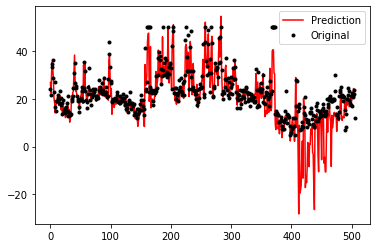

In [78]:
p3 = model.predict(inputsall)
plt.plot(p3, 'r-', label='Prediction')
plt.plot(outputs, 'k.', label='Original')
plt.legend()

In [70]:
p

array([[28.865503  ],
       [24.124964  ],
       [31.637314  ],
       [30.401217  ],
       [29.884493  ],
       [25.710922  ],
       [21.90805   ],
       [18.922514  ],
       [ 9.411969  ],
       [19.127811  ],
       [19.375109  ],
       [21.398724  ],
       [19.260578  ],
       [19.783842  ],
       [19.48351   ],
       [18.980286  ],
       [20.684116  ],
       [16.27538   ],
       [14.858627  ],
       [16.702562  ],
       [10.073452  ],
       [16.61898   ],
       [14.804979  ],
       [12.178856  ],
       [14.93086   ],
       [12.884353  ],
       [15.145823  ],
       [15.085376  ],
       [20.358707  ],
       [21.89804   ],
       [ 9.995225  ],
       [17.7146    ],
       [ 8.407611  ],
       [12.4113035 ],
       [13.584688  ],
       [20.154129  ],
       [18.597202  ],
       [20.195398  ],
       [20.08611   ],
       [27.123434  ],
       [31.03198   ],
       [28.724707  ],
       [24.599854  ],
       [23.894564  ],
       [21.819317  ],
       [19

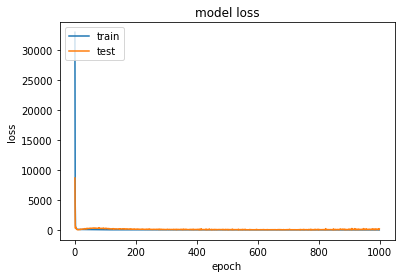

In [80]:
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## References

[1] - https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155

[2] - https://rpubs.com/chocka314/251613 Look at this one for the actual vs prediction plot.

[3] - https://scikit-learn.org/stable/modules/preprocessing.html